Target Fund Comparsion: TD Nasdaq® Index Fund (TD)

Strategy1: EMA and RSI with stop loss 
Strategy2: BB and William %
Strategy3: William %R
Strategy4: Aroon Oscillator
Strategy5: Candlestick pattern Hammer + trailing stop loss 5% + TP 30%
Strategy6: Ultimate Oscillator
Strategy7: Connor RSI
Strategy8: Parabolic SAR
Strategy9: Commodity Channel Index with stop loss 

Create a dataframe that contains:
Ticker, Buy date, Sell date, Buy price, sell price, % return of each trade

From the Dataframe, we need to get:
Win rate
Average return per trade
Average return per year
Average return per stock per year
In the end, compare the return with mutual funds

In [2]:
### Import libraries

import yfinance as yf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define TDB908 data and convert it directly to a pandas DataFrame
TDB908_df = pd.DataFrame({
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Annual Return (%)": [8.77, 5.90, 31.39, -1.79, 36.49, 44.78, 26.07, -33.71, 52.06, 17.49]
})

# Display the DataFrame
print(TDB908_df)


   Year  Annual Return (%)
0  2015               8.77
1  2016               5.90
2  2017              31.39
3  2018              -1.79
4  2019              36.49
5  2020              44.78
6  2021              26.07
7  2022             -33.71
8  2023              52.06
9  2024              17.49


In [4]:
def download_data(tickers, start_date, end_date):
    """
    Downloads historical stock data for the given tickers within the specified date range.

    Parameters:
        tickers (list): List of stock tickers.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Returns:
        dict: A dictionary where each key is a ticker, and the value is a DataFrame of historical data.
    """
    # Download data for all tickers
    data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)
    
    # Organize and clean data by ticker
    ticker_data = {ticker: data[ticker].dropna() for ticker in tickers}
    return ticker_data

# Define parameters
tickers = ['MSFT', 'NVDA', 'AAPL', 'GOOG', 'AMZN', 'META', 'AVGO', 'COST', 
           'TSLA', 'NFLX', 'AMD', 'PEP', 'ADBE', 'LIN', 'CSCO', 'TMUS', 
           'QCOM', 'INTC', 'INTU', 'AMAT', 'CMCSA', 'TXN', 'AMGN', 'ISRG']
start_date = '2014-10-31'
end_date = '2024-10-31'

# Download data
data = download_data(tickers, start_date, end_date)

print(data['MSFT'])


[*********************100%***********************]  24 of 24 completed

Price                            Open        High         Low       Close  \
Date                                                                        
2014-10-31 00:00:00+00:00   46.939999   46.970001   46.480000   46.950001   
2014-11-03 00:00:00+00:00   46.889999   47.459999   46.730000   47.439999   
2014-11-04 00:00:00+00:00   47.299999   47.730000   47.250000   47.570000   
2014-11-05 00:00:00+00:00   47.799999   47.900002   47.259998   47.860001   
2014-11-06 00:00:00+00:00   47.860001   48.860001   47.790001   48.700001   
...                               ...         ...         ...         ...   
2024-10-24 00:00:00+00:00  425.329987  425.980011  422.399994  424.730011   
2024-10-25 00:00:00+00:00  426.760010  432.519989  426.570007  428.149994   
2024-10-28 00:00:00+00:00  431.660004  431.940002  426.299988  426.589996   
2024-10-29 00:00:00+00:00  428.000000  433.170013  425.799988  431.950012   
2024-10-30 00:00:00+00:00  437.440002  438.500000  432.100006  432.529999   

In [6]:
# Download data
ticker_data = download_data(tickers, start_date, end_date)

# Calculate daily returns for each stock
daily_returns = {ticker: data['Adj Close'].pct_change() for ticker, data in ticker_data.items()}

# Combine all daily returns into a single DataFrame
daily_returns_df = pd.DataFrame(daily_returns)

# Display the first few rows of the DataFrame for verification
print(daily_returns_df.head())


[*********************100%***********************]  24 of 24 completed

                               MSFT      NVDA      AAPL      GOOG      AMZN  \
Date                                                                          
2014-10-31 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2014-11-03 00:00:00+00:00  0.010436  0.016889  0.012963 -0.006904  0.000851   
2014-11-04 00:00:00+00:00  0.002741  0.013085 -0.007312 -0.001999 -0.009519   
2014-11-05 00:00:00+00:00  0.006096  0.000000  0.002394 -0.014780 -0.020772   
2014-11-06 00:00:00+00:00  0.017551  0.004471  0.002860 -0.007107  0.000405   

                               META      AVGO      COST      TSLA      NFLX  \
Date                                                                          
2014-10-31 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2014-11-03 00:00:00+00:00 -0.014802  0.001043  0.006748  0.003682 -0.011101   
2014-11-04 00:00:00+00:00  0.025447 -0.011350  0.016981 -0.015087 -0.014495   
2014-11-05 00:00:00+00:00 -0.012276  0.015815 -0.00

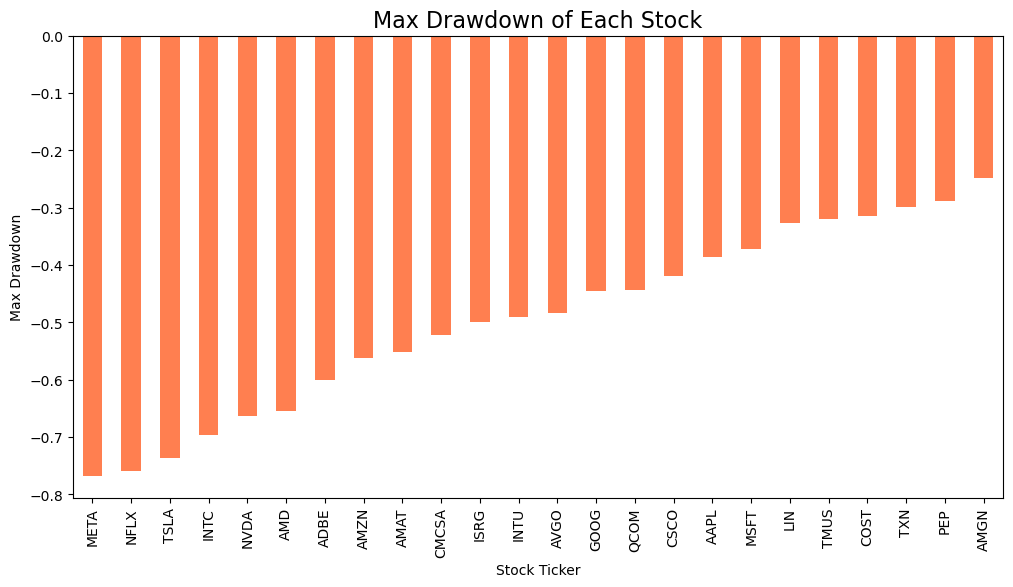

In [7]:
def max_drawdown(series):
    """
    Calculates the maximum drawdown for a given time series of returns.

    Parameters:
        series (pd.Series): A time series of daily returns.

    Returns:
        float: The maximum drawdown as a negative value, representing the largest peak-to-trough decline.
    """
    cumulative = (series + 1).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

# Calculate maximum drawdown for each stock
max_drawdowns = {
    ticker: max_drawdown(ticker_data[ticker]['Adj Close'].pct_change().dropna()) 
    for ticker in tickers
}

# Plot bar chart
plt.figure(figsize=(12, 6))
pd.Series(max_drawdowns).sort_values().plot(kind='bar', color='coral')
plt.title("Max Drawdown of Each Stock", fontsize=16)
plt.ylabel("Max Drawdown")
plt.xlabel("Stock Ticker")
plt.show()


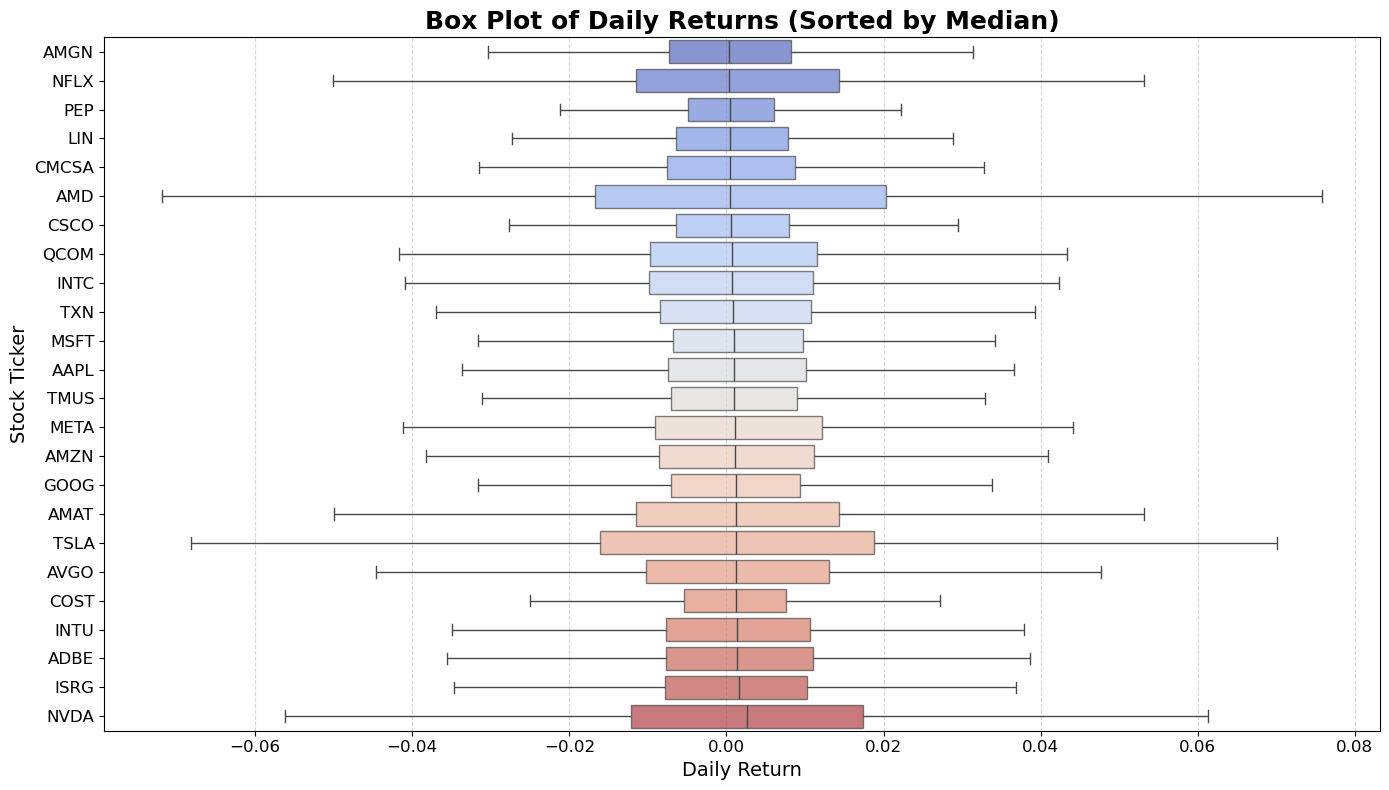

In [8]:
# Sort tickers by their median daily return
sorted_tickers_median = daily_returns_df.median().sort_values().index

# Create a box plot of daily returns
plt.figure(figsize=(14, 8))

sns.boxplot(
    data=daily_returns_df[sorted_tickers_median],  # Reorder data by sorted tickers
    orient="h",  # Horizontal box plot
    palette="coolwarm",  # Color palette
    showfliers=False,  # Hides outliers for cleaner visualization
    boxprops=dict(alpha=0.7),  # Add transparency to boxes
)

# Improve plot aesthetics
plt.title("Box Plot of Daily Returns (Sorted by Median)", fontsize=18, weight='bold')  # Bold title
plt.xlabel("Daily Return", fontsize=14)  # Label for x-axis
plt.ylabel("Stock Ticker", fontsize=14)  # Label for y-axis
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.xticks(fontsize=12)  # Customize x-axis tick font size
plt.yticks(fontsize=12)  # Customize y-axis tick font size
plt.tight_layout()  # Adjust layout to prevent clipping

# Display the plot
plt.show()


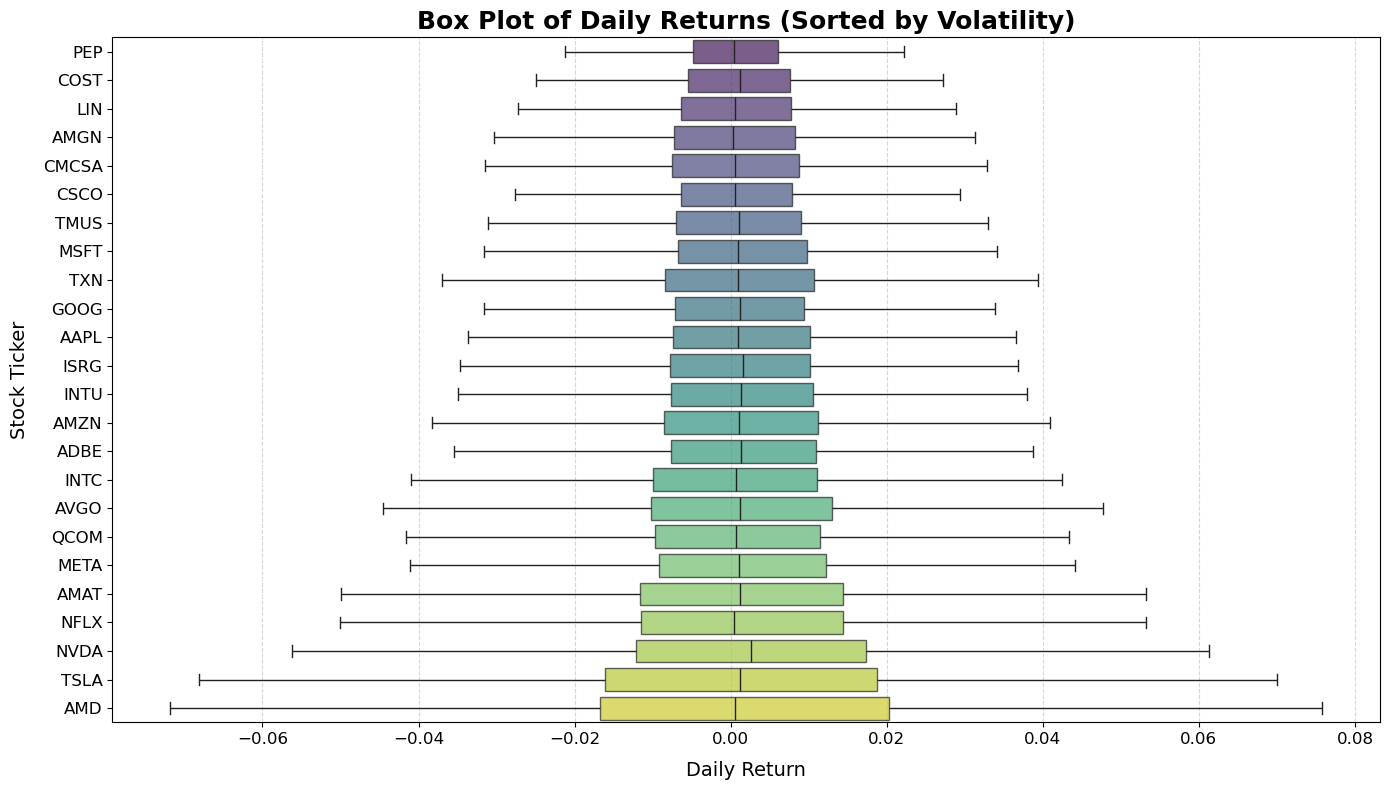

In [9]:
# Sort tickers by volatility
sorted_tickers_volatility = daily_returns_df.std().sort_values().index

# Create the plot
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=daily_returns_df[sorted_tickers_volatility],
    orient="h",
    palette="viridis",
    showfliers=False,  # Hide outliers for clarity
    boxprops=dict(alpha=0.7)  # Slight transparency for better visualization
)

# Improve aesthetics
plt.title("Box Plot of Daily Returns (Sorted by Volatility)", fontsize=18, weight='bold', loc='center')
plt.xlabel("Daily Return", fontsize=14, labelpad=10)
plt.ylabel("Stock Ticker", fontsize=14, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add subtle gridlines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


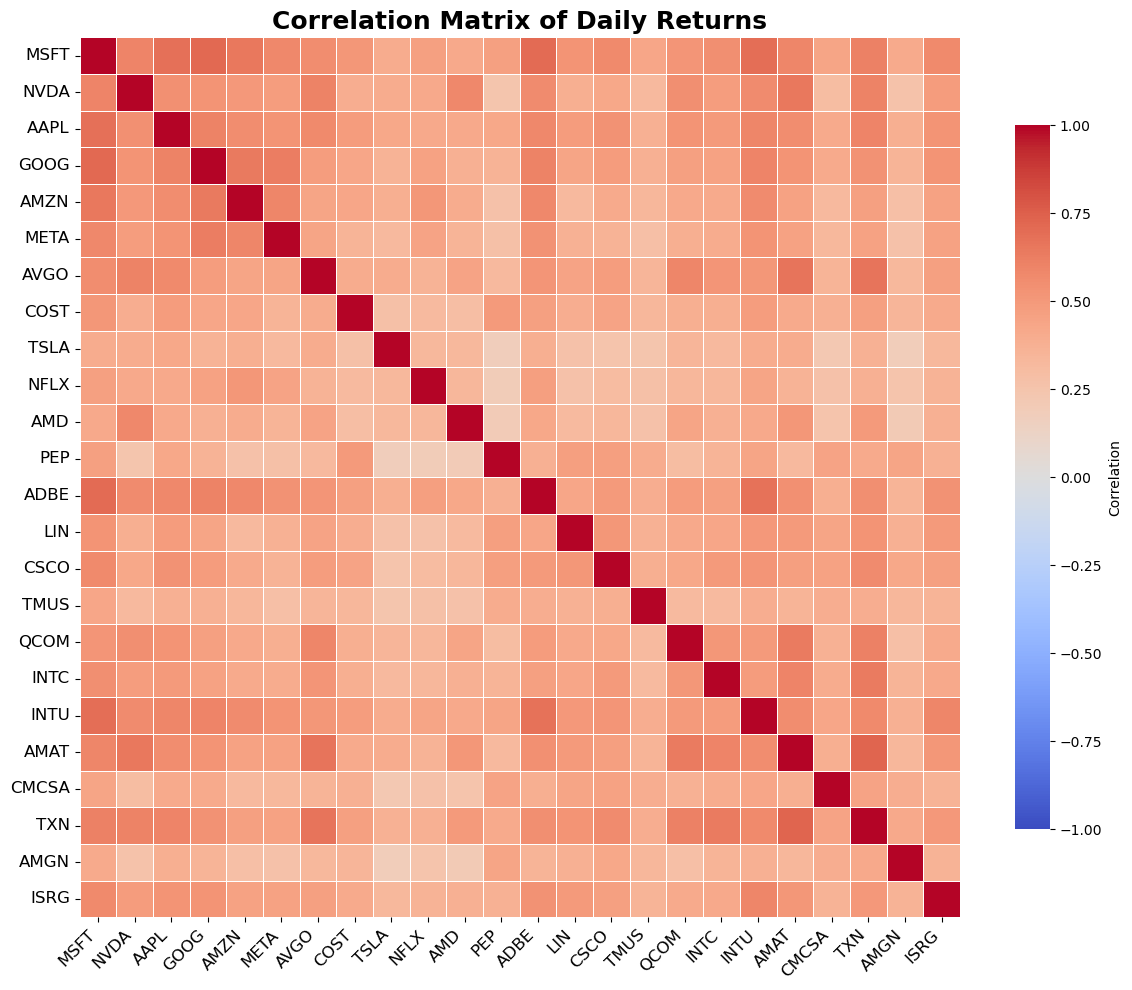

In [10]:
# Calculate the correlation matrix
correlation_matrix = daily_returns_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=False,          # Disable annotations for a cleaner look
    cmap="coolwarm",      # Diverging color palette
    vmin=-1, vmax=1,      # Standardize range to [-1, 1]
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'},  # Adjust and label color bar
    linewidths=0.5        # Add light gridlines for cell separation
)

# Improve plot aesthetics
plt.title("Correlation Matrix of Daily Returns", fontsize=18, weight='bold')
plt.xticks(fontsize=12, rotation=45, ha="right")  # Rotate for readability
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()  # Avoid clipping of labels

# Show the plot
plt.show()


In [11]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import talib
import pandas_ta as ta

# Define the trading strategy class
class EmaRsiStrategy(Strategy):
    """Trading strategy using EMA and RSI indicators with stop loss and take profit."""
    stop_loss = 0.05  # 5% stop loss
    take_profit = 0.10  # 10% take profit
    rsi_period = 14
    ema_period = 9

    def init(self):
        """Initialize indicators."""
        self.ema = self.I(talib.EMA, self.data.Close, self.ema_period)
        self.rsi = self.I(talib.RSI, self.data.Close, self.rsi_period)

    def next(self):
        """Define the strategy logic."""
        # Buy when Close < EMA and RSI < 40
        if self.data.Close[-1] < self.ema[-1] and self.rsi[-1] < 40:
            self.buy(
                sl=self.data.Close[-1] * (1 - self.stop_loss), 
                tp=self.data.Close[-1] * (1 + self.take_profit)
            )

        # Close position when Close > EMA and RSI > 60
        elif self.data.Close[-1] > self.ema[-1] and self.rsi[-1] > 60:
            if self.position:
                self.position.close()
                
# Function to apply the strategy and return the trade results
def apply_strategy(tickers, start_date, end_date, strategy_class):
    all_trades = []

    # Download data
    data_1 = download_data(tickers, start_date, end_date)

    # Backtest the strategy for each ticker
    for ticker, data in data_1.items():
        # Prepare data for backtesting.py
        data = data.rename(columns={"Open": "Open", "High": "High", "Low": "Low", "Close": "Close", "Volume": "Volume"})
        data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

        # Run backtest
        bt = Backtest(data, strategy_class, cash=100_000_000, commission=0.002)
        stats = bt.run()

        # Extract trades from the stats
        trades = stats['_trades']
        if not trades.empty:
            trades_df = pd.DataFrame({
                "Ticker": ticker,
                "Buy date": trades['EntryTime'].dt.strftime('%Y-%m-%d'),
                "Sell date": trades['ExitTime'].dt.strftime('%Y-%m-%d'),
                "Buy Price": trades['EntryPrice'],
                "Sell Price": trades['ExitPrice'],
                "% Return": ((trades['ExitPrice'] - trades['EntryPrice']) / trades['EntryPrice']) * 100
            })
            all_trades.append(trades_df)

    # Combine all trades into a single DataFrame
    result_df = pd.concat(all_trades, ignore_index=True)
    return result_df

# Apply the strategy
ema_rsi_result_df = apply_strategy(tickers, start_date, end_date, EmaRsiStrategy)

# Display the result
print(ema_rsi_result_df)

/opt/anaconda3/lib/python3.12/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

[*********************100%***********************]  24 of 24 completed


     Ticker    Buy date   Sell date   Buy Price  Sell Price  % Return
0      MSFT  2014-12-17  2015-01-27   45.140099   42.902000 -4.958118
1      MSFT  2015-01-28  2015-01-30   42.825482   40.527000 -5.367089
2      MSFT  2015-01-30  2015-04-24   41.633099   45.660000  9.672354
3      MSFT  2015-06-30  2015-07-17   44.799419   46.549999  3.907596
4      MSFT  2015-08-24  2015-08-24   40.530901   40.450001 -0.199601
...     ...         ...         ...         ...         ...       ...
2291   ISRG  2023-09-21  2023-10-12  290.640118  277.361992 -4.568580
2292   ISRG  2023-10-12  2023-10-12  282.493853  267.700508 -5.236696
2293   ISRG  2023-10-13  2023-11-14  267.363647  292.731995  9.488331
2294   ISRG  2024-04-18  2024-05-16  373.315147  398.279999  6.687340
2295   ISRG  2024-07-19  2024-07-22  450.328853  462.329987  2.664971

[2296 rows x 6 columns]


In [12]:
##### Strategy 7
class ConnorRsiStrategy(Strategy):
    # Define parameters as class attributes
    rsi_period = 3
    rsi_streak_period = 2
    rsi_close_period = 50
    stop_loss = 0.05
    take_profit = 0.30

    def init(self):
        # Convert `self.data.Close` to a pandas.Series
        close_series = pd.Series(self.data.Close, index=self.data.index)

        # Calculate Connor RSI components
        self.rsi_close = self.I(ta.rsi, close_series, length=self.rsi_period)

        # Calculate streaks
        streak = close_series.diff().apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0)).cumsum()
        self.rsi_streak = self.I(ta.rsi, streak, length=self.rsi_streak_period)

        # Percent rank
        percent_rank = close_series.rank(pct=True)
        self.rsi_percent = self.I(ta.rsi, percent_rank, length=self.rsi_close_period)

        # Final Connor RSI
        self.connor_rsi = self.I(
            lambda rsi_close, rsi_streak, rsi_percent: (rsi_close + rsi_streak + rsi_percent) / 3,
            self.rsi_close, self.rsi_streak, self.rsi_percent
        )

    def next(self):
        # Buy condition: Connor RSI < 20
        if not self.position and self.connor_rsi[-1] < 20:
            self.buy(
                sl=self.data.Close[-1] * (1 - self.stop_loss), 
                tp=self.data.Close[-1] * (1 + self.take_profit)
            )

        # Sell condition: Connor RSI > 80 or stop-loss hit
        elif self.position:
            entry_price = self.trades[-1].entry_price if self.trades else None
            if entry_price and (
                self.connor_rsi[-1] > 80 or self.data.Close[-1] < entry_price * (1 - self.stop_loss)
            ):
                self.position.close()

# Apply Connor RSI strategy
connor_rsi_result_df = apply_strategy(tickers, start_date, end_date, ConnorRsiStrategy)

# Display results
print(connor_rsi_result_df)

[*********************100%***********************]  24 of 24 completed


    Ticker    Buy date   Sell date   Buy Price  Sell Price   % Return
0     MSFT  2015-01-29  2015-04-27   41.011860   47.230000  15.161807
1     MSFT  2015-06-09  2015-07-07   45.851518   43.443500  -5.251775
2     MSFT  2015-08-24  2015-08-24   40.530901   40.450001  -0.199601
3     MSFT  2015-08-25  2015-08-26   42.655140   42.009998  -1.512459
4     MSFT  2016-02-09  2016-03-18   49.118040   54.919998  11.812274
..     ...         ...         ...         ...         ...        ...
660   ISRG  2022-01-24  2022-01-24  265.149235  256.053499  -3.430421
661   ISRG  2022-05-10  2022-06-13  215.129397  198.274506  -7.834769
662   ISRG  2022-06-14  2022-09-27  195.019265  185.221501  -5.023998
663   ISRG  2022-09-28  2022-10-24  188.726706  218.839996  15.956030
664   ISRG  2023-08-08  2023-08-17  306.852470  293.777991  -4.260836

[665 rows x 6 columns]


In [13]:
#### Strategy 9
class CCIStrategy(Strategy):
    cci_period = 20  # Default CCI period
    stop_loss = 0.05  # Default stop loss (5%)
    take_profit = 0.30  # Default take profit (30%)

    def init(self):
        """
        Initialize the strategy by calculating the CCI indicator.
        """
        # Extract High, Low, and Close prices
        high = pd.Series(self.data.High)
        low = pd.Series(self.data.Low)
        close = pd.Series(self.data.Close)

        # Compute CCI using pandas_ta
        cci = ta.cci(high, low, close, length=self.cci_period)

        # Handle cases where CCI calculation is invalid
        self.cci = self.I(lambda: cci if cci is not None else np.full(len(close), np.nan))

    def next(self):
        """
        Define the logic for entering and exiting trades based on CCI values.
        """
        current_price = self.data.Close[-1]

        # Entry condition: CCI < -100
        if not self.position and self.cci[-1] < -100:
            self.buy(
                sl=current_price * (1 - self.stop_loss),
                tp=current_price * (1 + self.take_profit)
            )

        # Exit condition: CCI > 100
        elif self.position and self.cci[-1] > 100:
            self.position.close()

# Define parameters
tickers = ['MSFT', 'NVDA', 'AAPL', 'GOOG', 'AMZN', 'META', 'AVGO', 'COST', 'TSLA', 'NFLX',
           'AMD', 'PEP', 'ADBE', 'LIN', 'CSCO', 'TMUS', 'QCOM', 'INTC', 'INTU', 'AMAT',
           'CMCSA', 'TXN', 'AMGN', 'ISRG']
start_date = '2014-10-31'
end_date = '2024-10-31'

# Apply the CCI strategy
cci_result_df = apply_strategy(tickers, start_date, end_date, CCIStrategy)

# Display the result
print(cci_result_df)


[*********************100%***********************]  24 of 24 completed


     Ticker    Buy date   Sell date   Buy Price  Sell Price  % Return
0      MSFT  2014-12-10  2014-12-16   47.675162   45.210500 -5.169698
1      MSFT  2014-12-17  2015-01-27   45.140099   42.902000 -4.958118
2      MSFT  2015-01-28  2015-01-30   42.825482   40.527000 -5.367089
3      MSFT  2015-02-02  2015-02-25   40.671180   43.950001  8.061779
4      MSFT  2015-03-11  2015-04-21   42.394621   43.000000  1.427961
...     ...         ...         ...         ...         ...       ...
2293   ISRG  2023-09-22  2023-10-12  287.062970  270.132506 -5.897822
2294   ISRG  2023-10-13  2023-11-14  267.363647  288.369995  7.856845
2295   ISRG  2024-04-05  2024-05-08  381.882235  384.929993  0.798088
2296   ISRG  2024-07-18  2024-07-22  425.850000  462.329987  8.566393
2297   ISRG  2024-10-07  2024-10-21  477.813705  519.039978  8.628106

[2298 rows x 6 columns]


In [14]:
from backtesting import Backtest, Strategy
import talib as ta

def download_data(tickers, start_date, end_date):
    """
    Downloads historical stock data for the given tickers within the specified date range.

    Parameters:
        tickers (list): List of stock ticker symbols.
        start_date (str): Start date in "YYYY-MM-DD" format.
        end_date (str): End date in "YYYY-MM-DD" format.

    Returns:
        dict: Dictionary where keys are ticker symbols and values are DataFrames of historical data.
    """
    # Download data for all tickers
    data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

    # Process and clean data for each ticker
    ticker_data = {ticker: data[ticker].dropna() for ticker in tickers}

    return ticker_data

class BollingerWilliamsStrategy(Strategy):
    """
    Trading strategy combining Bollinger Bands and Williams %R indicators.
    """
    bb_period = 20
    bb_dev = 2
    williams_period = 20
    take_profit = 0.30
    stop_loss = 0.05

    def init(self):
        """
        Initializes the Bollinger Bands and Williams %R indicators.
        """
        # Calculate Bollinger Bands
        self.bb_upper, self.bb_middle, self.bb_lower = ta.BBANDS(
            self.data.Close,
            timeperiod=self.bb_period,
            nbdevup=self.bb_dev,
            nbdevdn=self.bb_dev,
            matype=0
        )

        # Calculate Williams %R
        self.williams = ta.WILLR(
            self.data.High,
            self.data.Low,
            self.data.Close,
            timeperiod=self.williams_period
        )

    def next(self):
        """
        Defines the trading logic for entry and exit conditions.
        """
        current_price = self.data.Close[-1]

        # Buy condition: Williams %R < -60 and price touches the lower Bollinger Band
        if self.williams[-1] < -60 and current_price <= self.bb_lower[-1]:
            self.buy(
                sl=current_price * (1 - self.stop_loss),
                tp=current_price * (1 + self.take_profit)
            )

        # Close condition: Williams %R > -40 and price touches the upper Bollinger Band
        elif self.williams[-1] > -40 and current_price >= self.bb_upper[-1]:
            if self.position:
                self.position.close()

# Apply the BollingerWilliamsStrategy
bb_will_result_df = apply_strategy(tickers, start_date, end_date, BollingerWilliamsStrategy)

# Display the result
print(bb_will_result_df)


[*********************100%***********************]  24 of 24 completed


    Ticker    Buy date   Sell date   Buy Price  Sell Price   % Return
0     COST  2014-11-04  2015-08-24  134.879221  127.556504  -5.429092
1     COST  2015-08-24  2015-08-24  132.233941  131.970001  -0.199601
2     COST  2015-08-25  2017-02-14  137.053559  172.861002  26.126606
3     COST  2017-02-14  2017-06-19  172.003324  163.362006  -5.023925
4     COST  2017-06-19  2017-06-23  167.384103  158.754501  -5.155569
..     ...         ...         ...         ...         ...        ...
611   AMGN  2023-05-25  2023-10-12  220.540206  287.716010  30.459663
612   AMGN  2023-10-12  2023-10-26  284.547971  269.420006  -5.316490
613   AMGN  2023-10-26  2023-10-31  272.043000  255.889999  -5.937664
614   AMGN  2023-10-31  2023-10-31  256.401779  250.030502  -2.484880
615   AMGN  2023-11-01  2024-07-12  256.782529  332.409996  29.451952

[616 rows x 6 columns]


In [15]:
class HammerStrategy(Strategy):
    take_profit = 0.30  # Take profit as 30% above the buy price
    stop_loss = 0.05    # Stop loss as 5% below the buy price

    def is_hammer(self, index):
        """
        Checks if the candlestick at the given index is a Hammer pattern.

        A Hammer pattern is defined by:
        - A small body compared to the candlestick's range.
        - A long lower shadow (at least 2x the body size).
        - Minimal or no upper shadow.
        """
        open_price = self.data.Open[index]
        close_price = self.data.Close[index]
        high_price = self.data.High[index]
        low_price = self.data.Low[index]

        body = abs(close_price - open_price)
        range_candle = high_price - low_price
        lower_shadow = min(open_price, close_price) - low_price
        upper_shadow = high_price - max(open_price, close_price)

        # Hammer pattern criteria
        small_body = body < (range_candle * 0.3)
        long_lower_shadow = lower_shadow > (2 * body)
        small_upper_shadow = upper_shadow < (0.2 * body)

        return small_body and long_lower_shadow and small_upper_shadow

    def init(self):
        """
        Initialize any indicators or variables (if needed).
        """
        pass

    def next(self):
        """
        Executes on each candlestick as the backtesting progresses.
        """
        # Ensure there is enough data to evaluate (minimum two candlesticks)
        if len(self.data) < 2:
            return

        # Check if the previous candlestick (index -1) is a Hammer pattern
        if self.is_hammer(-1):
            buy_price = self.data.Close[-1]
            take_profit_price = buy_price * (1 + self.take_profit)  # 30% above buy price
            stop_loss_price = buy_price * (1 - self.stop_loss)      # 5% below buy price

            # Place a buy order with stop loss and take profit
            self.buy(sl=stop_loss_price, tp=take_profit_price)


# Apply the HammerStrategy
hammer_result_df = apply_strategy(tickers, start_date, end_date, HammerStrategy)

# Display the result
print(hammer_result_df)


[*********************100%***********************]  24 of 24 completed


    Ticker    Buy date   Sell date   Buy Price  Sell Price   % Return
0     MSFT  2015-10-02  2016-08-05   44.358540   57.993001  30.736945
1     MSFT  2016-09-07  2017-08-31   57.584941   74.893001  30.056572
2     MSFT  2018-01-12  2018-09-21   88.847338  114.504002  28.877246
3     MSFT  2019-07-30  2019-08-05  140.420279  133.300003  -5.070689
4     MSFT  2019-09-05  2020-02-04  139.388221  178.919006  28.360205
..     ...         ...         ...         ...         ...        ...
362   ISRG  2022-01-12  2022-01-14  325.459618  310.390015  -4.630253
363   ISRG  2023-04-04  2023-06-15  254.087162  329.588998  29.714936
364   ISRG  2023-09-07  2023-09-20  306.141059  292.447997  -4.472795
365   ISRG  2024-03-15  2024-04-19  398.956324  365.094498  -8.487602
366   ISRG  2024-09-13  2024-10-30  491.260559  516.559998   5.149902

[367 rows x 6 columns]


In [16]:
class UltimateOscillatorStrategy(Strategy):
    # Define the periods for the Ultimate Oscillator
    short_period = 3
    medium_period = 7
    long_period = 10

    def init(self):
        """
        Initialize the strategy and calculate the Ultimate Oscillator as an indicator.
        """
        # Access data values as NumPy arrays
        self.high = np.asarray(self.data.High)
        self.low = np.asarray(self.data.Low)
        self.close = np.asarray(self.data.Close)

        # Calculate the Ultimate Oscillator and register it as an indicator
        self.uo = self.I(self.calculate_ultimate_oscillator, self.high, self.low, self.close)

    def calculate_ultimate_oscillator(self, high, low, close):
        """
        Calculate the Ultimate Oscillator based on given high, low, and close prices.
        """
        # Calculate Buying Pressure (BP) and True Range (TR)
        previous_close = np.roll(close, 1)
        bp = close - np.minimum(low, previous_close)
        tr = np.maximum(high - low, np.maximum(np.abs(high - previous_close), np.abs(low - previous_close)))

        # Handle edge cases: first element in BP and TR is invalid due to np.roll
        bp[0] = np.nan
        tr[0] = np.nan

        # Compute rolling sums for BP and TR
        bp_short = self.rolling_sum(bp, self.short_period)
        tr_short = self.rolling_sum(tr, self.short_period)

        bp_medium = self.rolling_sum(bp, self.medium_period)
        tr_medium = self.rolling_sum(tr, self.medium_period)

        bp_long = self.rolling_sum(bp, self.long_period)
        tr_long = self.rolling_sum(tr, self.long_period)

        # Calculate the Ultimate Oscillator
        uo = 100 * ((4 * bp_short + 2 * bp_medium + bp_long) /
                    (4 * tr_short + 2 * tr_medium + tr_long))

        return uo

    @staticmethod
    def rolling_sum(arr, window):
        """
        Compute a rolling sum for a 1D NumPy array.
        """
        result = np.full_like(arr, np.nan)
        for i in range(window - 1, len(arr)):
            result[i] = np.sum(arr[i - window + 1:i + 1])
        return result

    def next(self):
        """
        Execute trading logic on each candlestick.

        - Buy when the Ultimate Oscillator is <= 30.
        - Close position when the Ultimate Oscillator is >= 50.
        """
        # Buy condition: Ultimate Oscillator below or equal to 30
        if self.uo[-1] <= 30:
            self.buy()

        # Close condition: Ultimate Oscillator above or equal to 50
        elif self.uo[-1] >= 50 and self.position:
            self.position.close()


# Apply the UltimateOscillatorStrategy
ulitmate_result_df = apply_strategy(tickers, start_date, end_date, UltimateOscillatorStrategy)

# Display the result
print(ulitmate_result_df)


[*********************100%***********************]  24 of 24 completed


    Ticker    Buy date   Sell date   Buy Price  Sell Price  % Return
0     MSFT  2014-12-16  2014-12-22   45.991802   47.779999  3.888078
1     MSFT  2015-01-05  2015-01-12   46.462739   47.419998  2.060273
2     MSFT  2015-01-29  2015-02-09   41.011860   42.240002  2.994600
3     MSFT  2015-03-13  2015-03-18   40.781401   41.430000  1.590430
4     MSFT  2015-03-30  2015-04-07   41.182198   41.610001  1.038804
..     ...         ...         ...         ...         ...       ...
928   ISRG  2022-09-22  2022-10-05  193.836897  198.270004  2.287030
929   ISRG  2023-08-17  2023-08-29  298.656118  301.500000  0.952226
930   ISRG  2023-09-22  2023-10-03  287.062970  291.540009  1.559601
931   ISRG  2024-04-05  2024-04-10  381.882235  387.160004  1.382041
932   ISRG  2024-04-22  2024-05-03  370.279089  380.000000  2.625293

[933 rows x 6 columns]


In [17]:
from backtesting import Backtest, Strategy

class AroonOscillatorStrategy(Strategy):
    # Define the period for Aroon Oscillator
    aroon_period = 14

    def init(self):
        """
        Initialize the strategy and calculate the Aroon Oscillator as an indicator.
        """
        # Access data values as NumPy arrays
        self.high = np.asarray(self.data.High)
        self.low = np.asarray(self.data.Low)

        # Calculate the Aroon Oscillator and register it as an indicator
        self.aroon_osc = self.I(self.calculate_aroon_oscillator, self.high, self.low, self.aroon_period)

    def calculate_aroon_oscillator(self, high, low, period):
        """
        Calculate the Aroon Oscillator for the given high and low prices.
        Aroon Oscillator = Aroon Up - Aroon Down.
        """
        aroon_up = self.calculate_aroon_up(high, period)
        aroon_down = self.calculate_aroon_down(low, period)
        return aroon_up - aroon_down

    def calculate_aroon_up(self, high, period):
        """
        Calculate the Aroon Up indicator.

        Aroon Up = [(period - periods_since_high) / period] * 100
        """
        aroon_up = np.full_like(high, np.nan)
        for i in range(period, len(high)):
            highest_high_index = np.argmax(high[i - period:i])  # Index of the highest high in the period
            aroon_up[i] = (period - highest_high_index) / period * 100
        return aroon_up

    def calculate_aroon_down(self, low, period):
        """
        Calculate the Aroon Down indicator.

        Aroon Down = [(period - periods_since_low) / period] * 100
        """
        aroon_down = np.full_like(low, np.nan)
        for i in range(period, len(low)):
            lowest_low_index = np.argmin(low[i - period:i])  # Index of the lowest low in the period
            aroon_down[i] = (period - lowest_low_index) / period * 100
        return aroon_down

    def next(self):
        """
        Execute trading logic on each candlestick.

        - Buy when Aroon Oscillator crosses above 20.
        - Close position when Aroon Oscillator crosses above 80.
        """
        # Ensure we have enough data for decision-making
        if len(self.aroon_osc) < 2:
            return

        # Buy condition: Aroon Oscillator crosses above 20
        if not self.position and self.aroon_osc[-2] <= 20 and self.aroon_osc[-1] > 20:
            self.buy()

        # Close condition: Aroon Oscillator crosses above 80
        elif self.position and self.aroon_osc[-2] <= 80 and self.aroon_osc[-1] > 80:
            self.position.close()

# Apply the strategy and print the result
try:
    aroon_result_df = apply_strategy(tickers, start_date, end_date, AroonOscillatorStrategy)
    print(aroon_result_df)
except Exception as e:
    print(f"Error during backtesting: {e}")


[*********************100%***********************]  24 of 24 completed


    Ticker    Buy date   Sell date   Buy Price  Sell Price   % Return
0     MSFT  2014-11-28  2015-01-20   48.045901   46.299999  -3.633820
1     MSFT  2015-03-09  2015-03-16   42.274379   41.470001  -1.902754
2     MSFT  2015-04-02  2015-06-09   40.741320   45.759998  12.318399
3     MSFT  2015-07-01  2015-08-25   44.548919   42.570000  -4.442127
4     MSFT  2015-11-17  2016-01-20   53.276338   49.980000  -6.187247
..     ...         ...         ...         ...         ...        ...
818   ISRG  2023-05-30  2023-08-10  309.497765  305.750000  -1.210918
819   ISRG  2023-09-19  2023-09-22  298.766353  286.489990  -4.109018
820   ISRG  2023-10-17  2023-10-30  272.954824  260.079987  -4.716838
821   ISRG  2023-12-11  2024-04-17  310.620000  378.929993  21.991499
822   ISRG  2024-07-19  2024-10-30  450.328853  516.559998  14.707284

[823 rows x 6 columns]


In [18]:
# Define the trading strategy class for William %R
class WilliamsRStrategy(Strategy):
    williams_period = 10  # Period for William %R
    take_profit = 0.10    # Take profit percentage (10%)

    def init(self):
        # Calculate Williams %R using TA-Lib
        self.williams = ta.WILLR(
            self.data.High, self.data.Low, self.data.Close, timeperiod=self.williams_period
        )

    def next(self):
        current_williams = self.williams[-1]  # Latest Williams %R value
        current_price = self.data.Close[-1]  # Latest closing price

        # Open long position if oversold and no position is open
        if current_williams <= -60 and not self.position:
            target_price = current_price * (1 + self.take_profit)
            self.buy(tp=target_price)

        # Close long position if overbought and position is open
        elif current_williams >= -40 and self.position:
            self.position.close()

# Apply the strategy and print the result
will_result_df = apply_strategy(tickers, start_date, end_date, WilliamsRStrategy)

# Display the result
print(will_result_df)


[*********************100%***********************]  24 of 24 completed


    Ticker    Buy date   Sell date   Buy Price  Sell Price   % Return
0     NVDA  2014-11-04  2015-02-12    0.501000    0.550000   9.780442
1     NVDA  2015-02-13  2015-09-30    0.557362    0.613250  10.027142
2     NVDA  2015-10-01  2015-10-14    0.617482    0.677875   9.780439
3     NVDA  2015-10-15  2015-11-06    0.686620    0.761250  10.869110
4     NVDA  2015-11-09  2016-03-28    0.782562    0.867625  10.869806
..     ...         ...         ...         ...         ...        ...
235   AMGN  2019-08-14  2019-11-21  203.215618  227.119995  11.763061
236   AMGN  2019-11-22  2020-07-01  228.536162  250.602008   9.655297
237   AMGN  2020-07-02  2022-11-08  253.375735  282.570007  11.522126
238   AMGN  2022-11-09  2024-02-01  290.580000  321.629016  10.685187
239   AMGN  2024-02-02  2024-10-30  324.287295  311.950012  -3.804430

[240 rows x 6 columns]


In [19]:
##### Strategy 8
from backtesting.lib import crossover

class ParabolicSARStrategy(Strategy):
    # Define parameters for the Parabolic SAR strategy
    acceleration_factor = 0.02  # AF (Acceleration Factor)
    max_acceleration = 0.2      # Max value for AF
    take_profit = 0.10
    stop_loss= 0.05

    def init(self):
        # Access data values as NumPy arrays
        self.high = np.asarray(self.data.High)
        self.low = np.asarray(self.data.Low)
        self.close = np.asarray(self.data.Close)

        # Calculate Parabolic SAR
        self.sar = self.I(self.calculate_parabolic_sar, self.high, self.low)

    def calculate_parabolic_sar(self, high, low):
        # Initialize arrays to store SAR values
        sar = np.zeros_like(high)
        sar[0] = low[0]  # Initial SAR value at the first data point

        # Variables to track trend
        is_uptrend = True  # Initially assuming an uptrend
        ep = high[0]  # EP (Extreme Point) for uptrend
        af = self.acceleration_factor  # AF (Acceleration Factor)

        for i in range(1, len(sar)):
            # Calculate SAR for the current trend
            sar[i] = sar[i-1] + af * (ep - sar[i-1])

            # Adjust the SAR for trend reversals
            if is_uptrend:
                if low[i] < sar[i]:
                    is_uptrend = False  # Trend reversal to downtrend
                    sar[i] = ep
                    ep = low[i]  # Reset EP to the current low
                    af = self.acceleration_factor  # Reset acceleration factor
            else:
                if high[i] > sar[i]:
                    is_uptrend = True  # Trend reversal to uptrend
                    sar[i] = ep
                    ep = high[i]  # Reset EP to the current high
                    af = self.acceleration_factor  # Reset acceleration factor

            # Update EP (Extreme Point) for the trend direction
            if is_uptrend:
                ep = max(ep, high[i])
            else:
                ep = min(ep, low[i])

            # Limit AF to max_acceleration
            af = min(self.acceleration_factor, self.max_acceleration)

        return sar

    def next(self):
        # Buy condition: Parabolic SAR below the close price
        if self.sar[-1] < self.close[-1] and not self.position:
            self.buy(tp=self.data.Close[-1] * (1 + self.take_profit),sl=self.data.Close[-1]*(1-self.stop_loss))

        # Sell condition: Parabolic SAR above the close price
        elif self.sar[-1] > self.close[-1] and self.position:
            self.position.close()

# Apply the ParabolicSARStrategy
SAR_result_df = apply_strategy(tickers, start_date, end_date, ParabolicSARStrategy)

# Display the result
print(SAR_result_df)

[*********************100%***********************]  24 of 24 completed


     Ticker    Buy date   Sell date   Buy Price  Sell Price   % Return
0      MSFT  2014-11-04  2014-12-17   47.394599   45.049999  -4.946977
1      MSFT  2014-12-18  2015-01-27   46.673162   42.950001  -7.977092
2      MSFT  2015-01-28  2015-01-30   42.825482   40.527000  -5.367089
3      MSFT  2015-02-02  2015-04-24   40.671180   45.660000  12.266228
4      MSFT  2015-04-27  2015-06-09   47.324460   45.476499  -3.904874
...     ...         ...         ...         ...         ...        ...
3880   ISRG  2024-03-12  2024-06-05  379.657794  416.789993   9.780439
3881   ISRG  2024-06-06  2024-07-22  414.747853  462.329987  11.472545
3882   ISRG  2024-07-23  2024-07-25  460.018206  438.063995  -4.772466
3883   ISRG  2024-07-26  2024-08-15  439.477206  480.413989   9.314882
3884   ISRG  2024-08-16  2024-10-30  478.966030  516.559998   7.848984

[3885 rows x 6 columns]


### Quick Overview on Strategies

In [20]:
def plot_annual_returns_with_baseline(strategy_results, strategy_names):
    """
    Plot annual returns for each strategy, including a hard-coded baseline (TDB908) for comparison.

    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names.
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    # Hard-coded TDB908 baseline
    TDB908_data = {
        "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        "Annual Return (%)": [8.77, 5.90, 31.39, -1.79, 36.49, 44.78, 26.07, -33.71, 52.06, 17.49]
    }
    TDB908_df = pd.DataFrame(TDB908_data).set_index('Year')

    annual_returns = {}

    # Calculate annual returns for each strategy
    for df, name in zip(strategy_results, strategy_names):
        # Ensure dates are in datetime format
        df['Buy date'] = pd.to_datetime(df['Buy date'])
        df['Sell date'] = pd.to_datetime(df['Sell date'])

        # Add a column for the year of the sell date
        df['Year'] = df['Sell date'].dt.year

        # Group by year and calculate adjusted annual return
        grouped = df.groupby('Year')
        unique_tickers = grouped['Ticker'].nunique()  # Count unique tickers per year
        total_returns = grouped['% Return'].sum()  # Sum returns for the year
        adjusted_returns = total_returns / unique_tickers  # Adjust returns by unique tickers

        # Store the results
        annual_returns[name] = adjusted_returns

    # Combine all strategy annual returns into a DataFrame
    annual_returns_df = pd.DataFrame(annual_returns).fillna(0)  # Fill NaN with 0 for years with no trades

    # Add TDB908 baseline to the DataFrame
    annual_returns_df['TDB908'] = TDB908_df['Annual Return (%)']

    # Plotting
    plt.figure(figsize=(12, 6))
    for strategy in annual_returns_df.columns:
        plt.plot(
            annual_returns_df.index,
            annual_returns_df[strategy],
            label=strategy,
            marker='o'
        )

    plt.title('Annual Returns for Each Strategy (Including TDB908 Baseline)')
    plt.xlabel('Year')
    plt.ylabel('Annual Return (%)')
    plt.legend(title="Strategies")
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


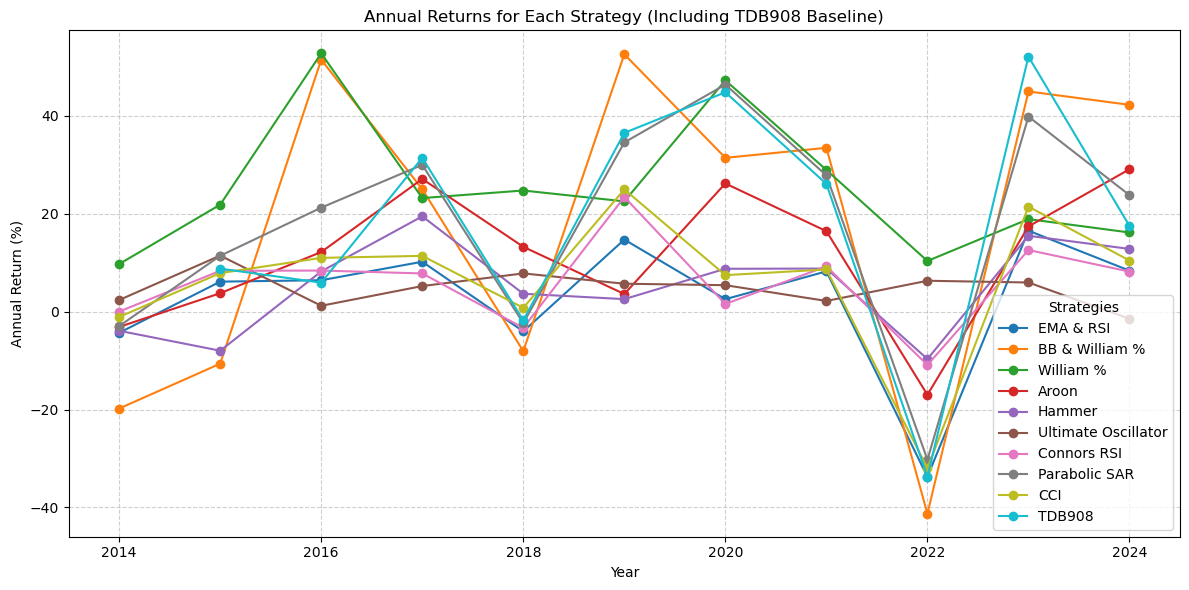

In [21]:
strategy_results = [
    ema_rsi_result_df,
    bb_will_result_df,
    will_result_df,
    aroon_result_df,
    hammer_result_df,
    ulitmate_result_df,
    connor_rsi_result_df,
    SAR_result_df,
    cci_result_df,
]

strategy_names = [
    "EMA & RSI",
    "BB & William %",
    "William %",
    "Aroon",
    "Hammer",
    "Ultimate Oscillator",
    "Connors RSI",
    "Parabolic SAR",
    "CCI",
]

# Generate the line chart
plot_annual_returns_with_baseline(strategy_results, strategy_names)


### Overall Strategies performance

In [22]:
def plot_total_transactions(strategy_results, strategy_names):
    """
    Plot the total number of transactions for each strategy as a bar chart.
    
    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names.
    """

    # Calculate the total number of transactions for each strategy
    total_transactions = [len(df) for df in strategy_results]

    # Plotting the bar chart
    plt.figure(figsize=(12, 6))
    bars = plt.bar(strategy_names, total_transactions, color='skyblue', edgecolor='black')

    # Annotate bars with transaction counts
    for bar, count in zip(bars, total_transactions):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, 
                 str(count), ha='center', fontsize=10)

    # Add chart labels and title
    plt.title('Total Number of Transactions per Strategy', fontsize=16, weight='bold')
    plt.xlabel('Strategy', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Display the plot
    plt.show()


In [23]:
def plot_return_distribution(strategy_results, strategy_names):
    """
    Plot the distribution of returns for each strategy as a box plot.

    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names.
    """
    # Prepare data for the box plot
    all_returns = []
    strategy_labels = []

    for df, name in zip(strategy_results, strategy_names):
        # Extract returns and associate them with the respective strategy
        all_returns.extend(df['% Return'].tolist())
        strategy_labels.extend([name] * len(df))  # Repeat the strategy name for each return

    # Combine the returns and strategy labels into a DataFrame for Seaborn
    plot_data = pd.DataFrame({'Return': all_returns, 'Strategy': strategy_labels})

    # Plotting the box plot
    plt.figure(figsize=(14, 7))
    sns.boxplot(
        x='Strategy',
        y='Return',
        data=plot_data,
        palette="Set2",
        linewidth=2,
        showfliers=True  # Include outliers for better understanding of data spread
    )

    # Chart customization
    plt.title('Return Distribution by Strategy', fontsize=16, weight='bold')
    plt.xlabel('Strategy', fontsize=12)
    plt.ylabel('Return (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for readability
    plt.tight_layout()

    # Display the plot
    plt.show()


In [24]:
def plot_avg_return_per_trade(strategy_results, strategy_names):
    """
    Plot the average return per trade for each strategy as a bar chart.

    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names.
    """
    # Calculate average return per trade for each strategy
    avg_returns = [
        df['% Return'].mean() if len(df) > 0 else 0  # Avoid division by zero
        for df in strategy_results
    ]

    # Create a bar chart
    plt.figure(figsize=(14, 7))
    bars = sns.barplot(
        x=strategy_names,
        y=avg_returns,
        palette="coolwarm",
        edgecolor="black"
    )

    # Add labels and formatting
    plt.title('Average Return per Trade by Strategy', fontsize=16, weight='bold')
    plt.xlabel('Strategy', fontsize=12)
    plt.ylabel('Average Return (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate strategy names for readability
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a reference line at 0%
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for readability
    plt.tight_layout()

    # Annotate each bar with the average return
    for bar, avg in zip(bars.patches, avg_returns):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Center text on bar
            height + (0.5 if height >= 0 else -0.5),  # Adjust text position based on value
            f"{avg:.2f}%",
            ha='center',
            va='bottom' if height >= 0 else 'top',
            fontsize=10
        )

    # Show the plot
    plt.show()


In [25]:
def plot_win_rate(strategy_results, strategy_names):
    """
    Plot the win rate per strategy as a bar chart.

    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names.
    """
    # Calculate win rate for each strategy
    win_rates = [
        (len(df[df['% Return'] > 0]) / len(df) * 100 if len(df) > 0 else 0)
        for df in strategy_results
    ]

    # Create a bar chart
    plt.figure(figsize=(14, 7))
    bars = sns.barplot(x=strategy_names, y=win_rates, palette="coolwarm", edgecolor="black")

    # Add labels and formatting
    plt.title('Win Rate per Strategy', fontsize=16, weight='bold')
    plt.xlabel('Strategy', fontsize=12)
    plt.ylabel('Win Rate (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Reference line at 0%
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for clarity
    plt.tight_layout()

    # Annotate each bar with the win rate
    for bar, win_rate in zip(bars.patches, win_rates):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # Center the text on the bar
            height + 1,  # Adjust position slightly above the bar
            f"{win_rate:.2f}%",
            ha='center',
            va='bottom',
            fontsize=10
        )

    # Show the plot
    plt.show()


In [26]:
def plot_running_sum_with_labels(strategy_results, strategy_names):
    """
    Plot the running sum of adjusted annual returns for each strategy with final point labels.

    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names.
    """
    # Initialize a dictionary to store the running sums
    running_sums = {}

    # Calculate the running sum of adjusted returns for each strategy
    for df, name in zip(strategy_results, strategy_names):
        # Ensure 'Buy date' and 'Sell date' are datetime format
        df['Buy date'] = pd.to_datetime(df['Buy date'])
        df['Sell date'] = pd.to_datetime(df['Sell date'])

        # Group by year and calculate adjusted returns
        df['Year'] = df['Sell date'].dt.year
        grouped = df.groupby('Year')
        unique_tickers = grouped['Ticker'].nunique()  # Count unique tickers
        total_returns = grouped['% Return'].sum()  # Sum returns per year
        adjusted_returns = total_returns / unique_tickers  # Adjust returns by unique tickers

        # Store the cumulative sum
        running_sums[name] = adjusted_returns.cumsum()

    # Plot the running sums
    plt.figure(figsize=(14, 7))
    for strategy in strategy_names:
        running_sum = running_sums[strategy]
        plt.plot(running_sum.index, running_sum, label=strategy, marker='o', linewidth=2)

        # Annotate the final value for each strategy
        final_year = running_sum.index[-1]
        final_value = running_sum.iloc[-1]
        plt.text(
            final_year,
            final_value,
            f'{final_value:.2f}',
            fontsize=10,
            ha='left',
            va='center',
            color='black',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
        )

    # Add titles, labels, and grid
    plt.title('Running Sum of Adjusted Annual Returns for Each Strategy', fontsize=16, weight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Running Sum of Adjusted Returns (%)', fontsize=12)
    plt.legend(title="Strategies", fontsize=10, title_fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()


/var/folders/ds/sfc3p2sn0z7crv4j6rylvv440000gn/T/ipykernel_1324/2304407974.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


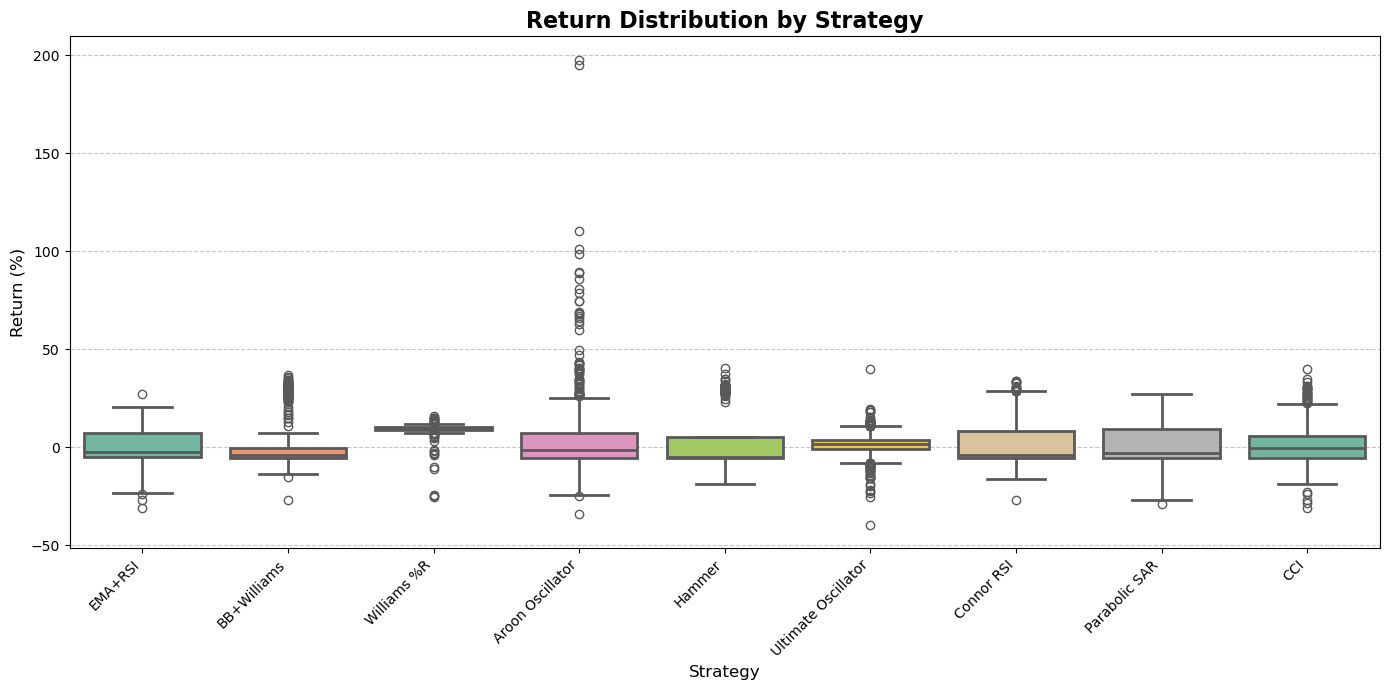

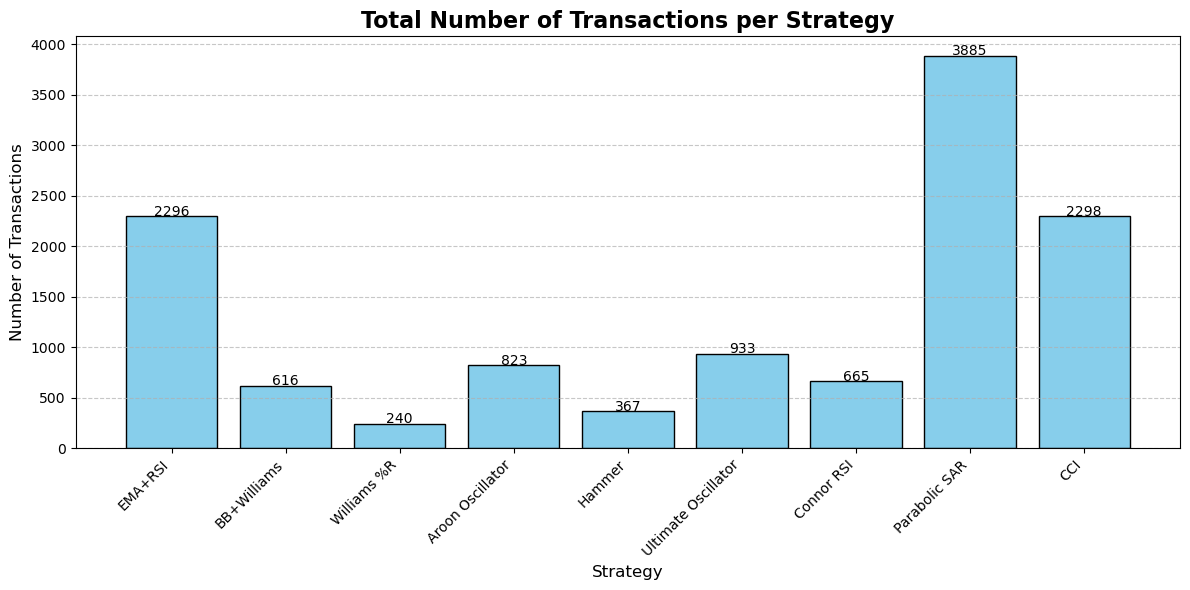

/var/folders/ds/sfc3p2sn0z7crv4j6rylvv440000gn/T/ipykernel_1324/472042895.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


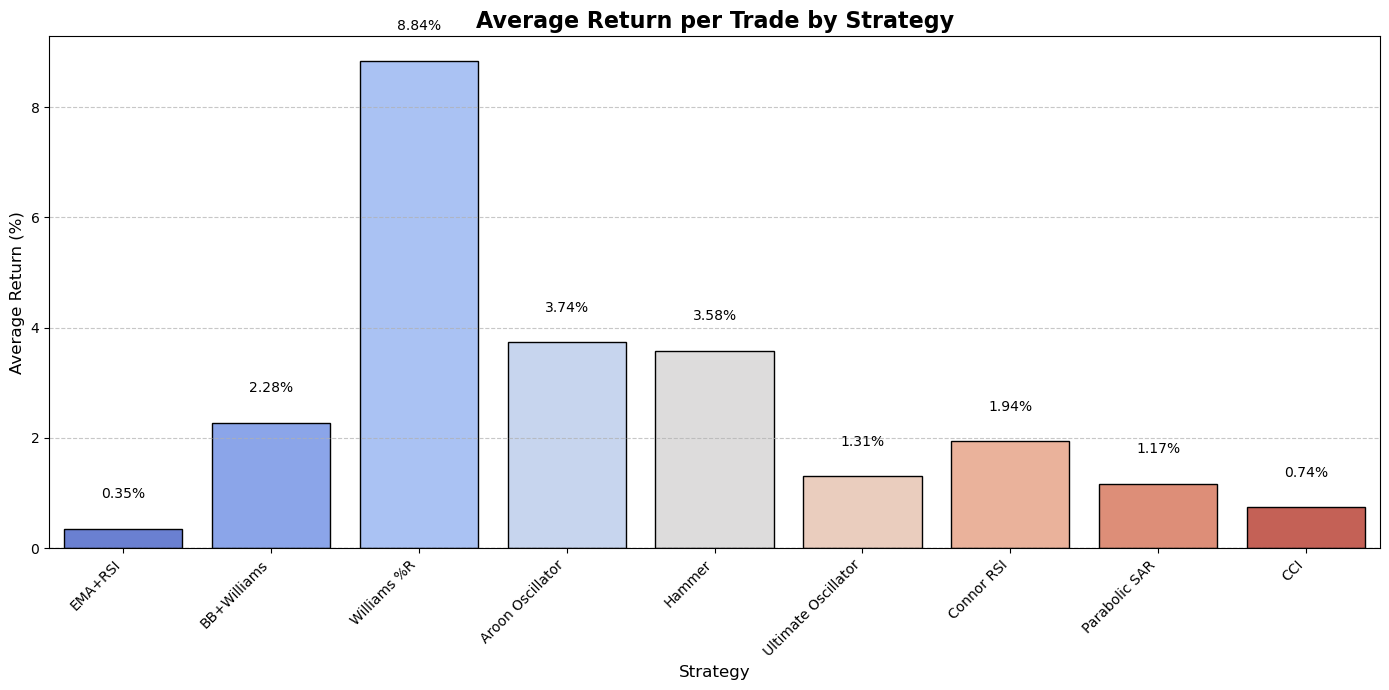

/var/folders/ds/sfc3p2sn0z7crv4j6rylvv440000gn/T/ipykernel_1324/3608478413.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=strategy_names, y=win_rates, palette="coolwarm", edgecolor="black")


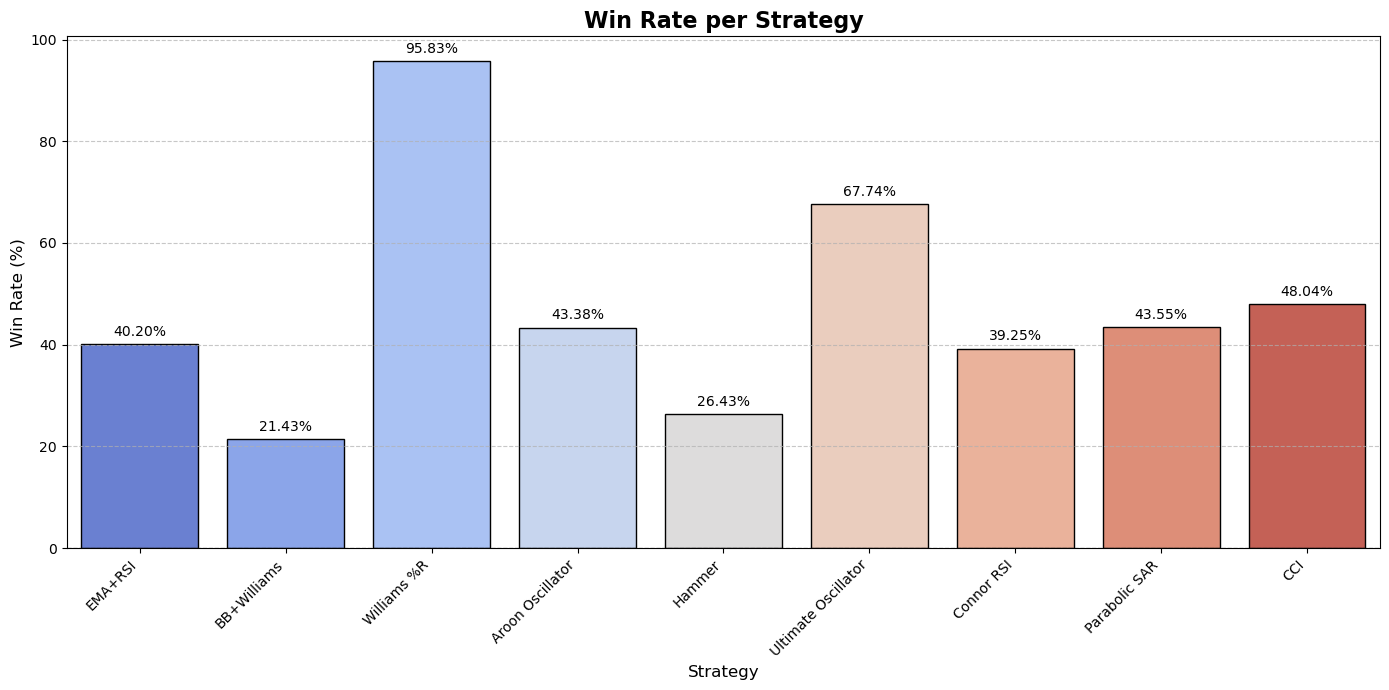

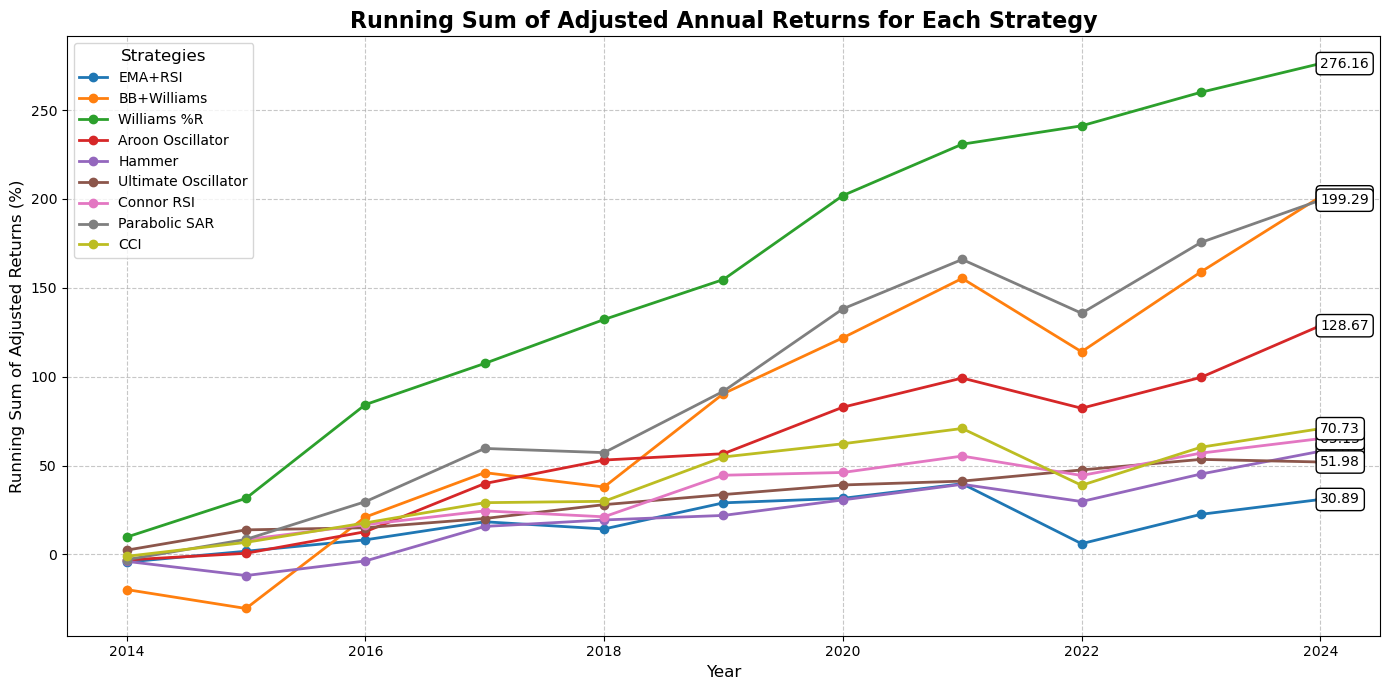

In [27]:
# Example strategy DataFrames and names
strategy_results = [
    ema_rsi_result_df, bb_will_result_df, will_result_df, aroon_result_df,
    hammer_result_df, ulitmate_result_df, connor_rsi_result_df, SAR_result_df, cci_result_df
]

strategy_names = [
    "EMA+RSI", "BB+Williams", "Williams %R", "Aroon Oscillator", 
    "Hammer", "Ultimate Oscillator", "Connor RSI", "Parabolic SAR", "CCI"
]

# Function calls for plotting various strategy metrics
def plot_strategy_metrics(strategy_results, strategy_names):
    """
    Calls multiple plotting functions to visualize strategy performance.
    """
    plot_return_distribution(strategy_results, strategy_names)
    plot_total_transactions(strategy_results, strategy_names)
    plot_avg_return_per_trade(strategy_results, strategy_names)
    plot_win_rate(strategy_results, strategy_names)
    plot_running_sum_with_labels(strategy_results, strategy_names)

# Call the function to plot all metrics
plot_strategy_metrics(strategy_results, strategy_names)


### TOP 3 Vs TD Fund

In [31]:
def plot_top_3_strategies_vs_tdb908(strategy_results, strategy_names):
    """
    Plot the performance of top 3 strategies (EMA+RSI, Williams %R, and Parabolic SAR) 
    compared with TDB908 baseline.
    
    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names.
    """
    # Define TDB908 data (hardcoded for now)
    TDB908_data = {
        "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        "Annual Return (%)": [8.77, 5.90, 31.39, -1.79, 36.49, 44.78, 26.07, -33.71, 52.06, 17.49]
    }
    TDB908_df = pd.DataFrame(TDB908_data)

    # Initialize a dictionary to store the adjusted annual returns for the strategies
    annual_returns = {
        "TDB908": TDB908_df.set_index('Year')['Annual Return (%)']
    }
    
    # Process each strategy to calculate the adjusted annual returns
    for df, name in zip(strategy_results, strategy_names):
        df['Buy date'] = pd.to_datetime(df['Buy date'])
        df['Sell date'] = pd.to_datetime(df['Sell date'])
        df['Year'] = df['Sell date'].dt.year
        
        # Group by year and compute adjusted returns
        grouped = df.groupby('Year')
        unique_tickers = grouped['Ticker'].nunique()
        total_returns = grouped['% Return'].sum()
        
        # Adjust returns by the number of unique tickers
        adjusted_returns = total_returns / unique_tickers
        annual_returns[name] = adjusted_returns

    # Convert the annual returns dictionary to a DataFrame for plotting
    annual_returns_df = pd.DataFrame(annual_returns)

    # Plotting the annual returns of the top strategies and TDB908
    plt.figure(figsize=(12, 6))
    for strategy in ["BB and William %", "Williams %R", "Parabolic SAR", "TDB908"]:
        plt.plot(annual_returns_df.index, annual_returns_df[strategy], label=strategy, marker='o')
    
    # Add titles and labels
    plt.title('Top 3 Strategies vs TDB908 Performance', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Annual Return (%)', fontsize=12)
    plt.legend(title="Strategies")
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Show the plot
    plt.show()


In [32]:
def plot_running_sum_comparison(strategy_results, strategy_names):
    """
    Plot the running sum of adjusted annual returns for the top 3 strategies
    compared with the TDB908 baseline.
    
    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names.
    """
    # Define TDB908 data (hardcoded for now)
    TDB908_data = {
        "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        "Annual Return (%)": [8.77, 5.90, 31.39, -1.79, 36.49, 44.78, 26.07, -33.71, 52.06, 17.49]
    }
    TDB908_df = pd.DataFrame(TDB908_data)

    # Initialize a dictionary to store the cumulative annual returns for the strategies
    annual_returns = {
        "TDB908": TDB908_df.set_index('Year')['Annual Return (%)'].cumsum()
    }
    
    # Process each strategy to calculate the cumulative adjusted annual returns
    for df, name in zip(strategy_results, strategy_names):
        # Ensure 'Buy date' and 'Sell date' are datetime format
        df['Buy date'] = pd.to_datetime(df['Buy date'])
        df['Sell date'] = pd.to_datetime(df['Sell date'])
        
        # Group by year and calculate adjusted returns
        df['Year'] = df['Sell date'].dt.year
        grouped = df.groupby('Year')
        
        # Adjust returns by the number of unique tickers
        adjusted_returns = grouped['% Return'].sum() / grouped['Ticker'].nunique()
        
        # Add the cumulative sum of adjusted annual returns to the dictionary
        annual_returns[name] = adjusted_returns.cumsum()

    # Convert the annual returns dictionary to a DataFrame for plotting
    running_sum_df = pd.DataFrame(annual_returns)

    # Plotting the running sum of adjusted returns for the top strategies and TDB908
    plt.figure(figsize=(12, 6))

    # Plot each strategy's running sum and TDB908 baseline
    for strategy in ["BB and William %", "Williams %R", "Parabolic SAR", "TDB908"]:
        plt.plot(running_sum_df.index, running_sum_df[strategy], label=strategy, marker='o')
    
    # Add titles and labels
    plt.title('Running Sum of Adjusted Returns: Top 3 Strategies vs TDB908', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Running Sum of Adjusted Returns (%)', fontsize=12)
    plt.legend(title="Strategies")
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Show the plot
    plt.show()


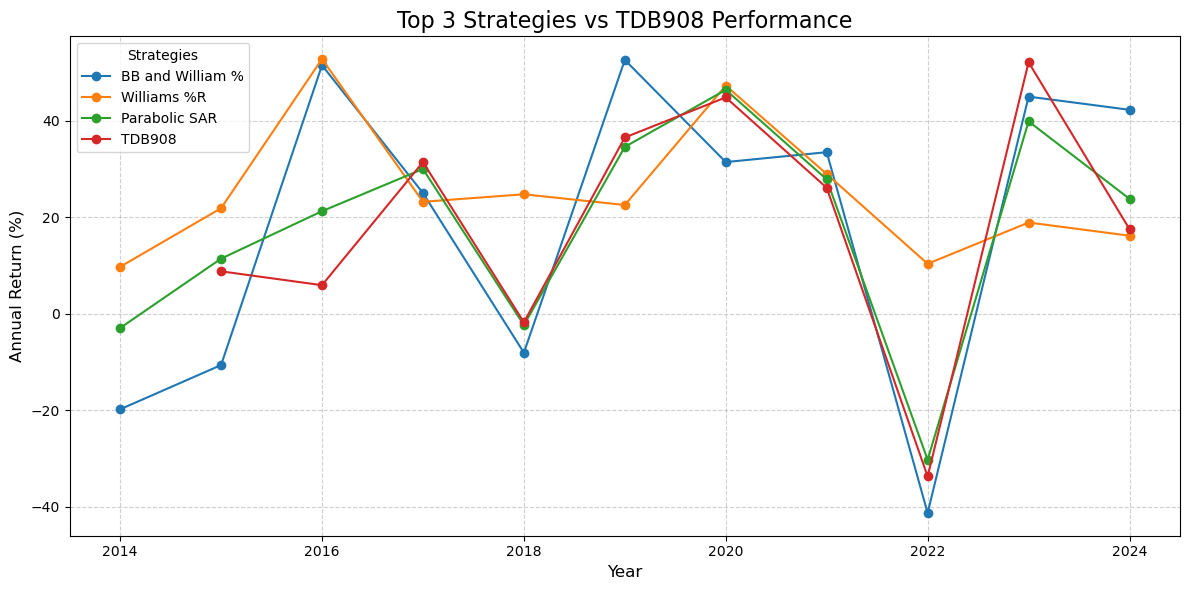

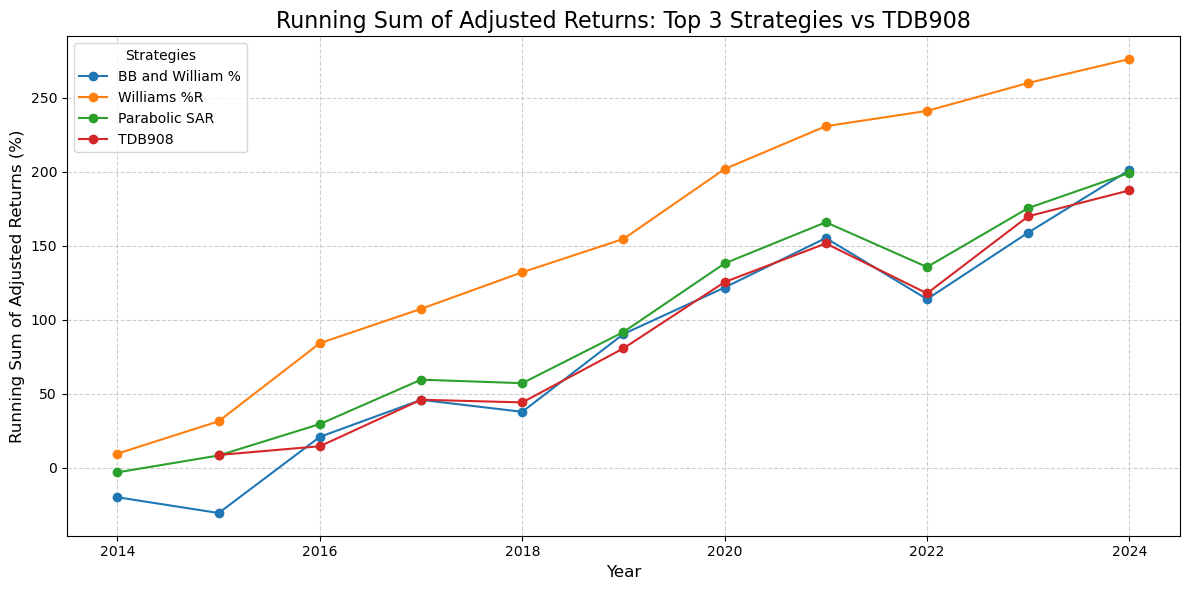

In [33]:
# Top 3 Strategy
strategy_results_top_3 = [bb_will_result_df, will_result_df, SAR_result_df]
strategy_names_top_3 = ["BB and William %", "Williams %R", "Parabolic SAR"]

# Call the function for plotting the performance of top 3 strategies vs TDB908
plot_top_3_strategies_vs_tdb908(strategy_results_top_3, strategy_names_top_3)

# Call the function for plotting the running sum comparison for top 3 strategies
plot_running_sum_comparison(strategy_results_top_3, strategy_names_top_3)


### Each Strategy Charts Functions

In [30]:
def plot_annual_performance_vs_tdb908(strategy_df, strategy_name):
    """
    Plot annual performance of a strategy compared to TDB908 baseline.
    
    Parameters:
        strategy_df (DataFrame): The strategy's data with columns:
            ['Ticker', 'Buy date', 'Sell date', 'Buy Price', 'Sell Price', '% Return']
        strategy_name (str): Name of the strategy.
    """
    # Ensure 'Sell date' is in datetime format
    strategy_df['Sell date'] = pd.to_datetime(strategy_df['Sell date'])
    
    # Group by year and calculate adjusted returns
    strategy_df['Year'] = strategy_df['Sell date'].dt.year
    grouped = strategy_df.groupby('Year')
    
    # Calculate adjusted returns per year (considering unique tickers)
    unique_tickers = grouped['Ticker'].nunique()
    total_returns = grouped['% Return'].sum()
    adjusted_returns = total_returns / unique_tickers
    adjusted_returns = adjusted_returns.fillna(0)
    
    # TDB908 baseline data
    TDB908_data = {
        "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        "Annual Return (%)": [8.77, 5.90, 31.39, -1.79, 36.49, 44.78, 26.07, -33.71, 52.06, 17.49]
    }
    TDB908_df = pd.DataFrame(TDB908_data).set_index('Year')
    
    # Prepare the data for comparison
    comparison_df = pd.DataFrame(adjusted_returns, columns=[strategy_name])
    comparison_df = comparison_df.join(TDB908_df, how='outer').fillna(0)
    
    # Plot the bar chart
    ax = comparison_df.plot(
        kind='bar',
        figsize=(12, 6),
        color=['#1f77b4', '#ff7f0e'],
        edgecolor='black',
        width=0.8
    )
    
    # Set plot titles and labels
    ax.set_title(f'Annual Performance: {strategy_name} vs TDB908', fontsize=16)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Annual Return (%)', fontsize=12)
    
    # Set legend and grid
    plt.legend([strategy_name, 'TDB908'], title="Legend")
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [31]:
def preprocess_strategy_data(strategy_df):
    """
    Helper function to preprocess strategy data.
    
    Parameters:
        strategy_df (DataFrame): The strategy's data with columns:
            ['Ticker', 'Buy date', 'Sell date', 'Buy Price', 'Sell Price', '% Return']
    
    Returns:
        DataFrame: The preprocessed strategy data with 'Year' column.
    """
    # Ensure 'Sell date' is in datetime format and add 'Year' column
    strategy_df['Sell date'] = pd.to_datetime(strategy_df['Sell date'])
    strategy_df['Year'] = strategy_df['Sell date'].dt.year
    return strategy_df

def plot_annual_transactions(strategy_df, strategy_name):
    """
    Plot annual number of transactions for a given strategy.
    
    Parameters:
        strategy_df (DataFrame): The strategy's data with columns:
            ['Ticker', 'Buy date', 'Sell date', 'Buy Price', 'Sell Price', '% Return']
        strategy_name (str): Name of the strategy.
    """
    # Preprocess the strategy data
    strategy_df = preprocess_strategy_data(strategy_df)
    
    # Group by year and count transactions
    annual_transactions = strategy_df.groupby('Year').size()
    
    # Plot the bar chart
    annual_transactions.plot(
        kind='bar',
        figsize=(12, 6),
        color='#2ca02c',
        edgecolor='black',
        width=0.8
    )
    plt.title(f'Annual Number of Transactions: {strategy_name}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_strategy_vs_tdb908(strategy_df, strategy_name, tdb908_df):
    """
    Plot the running sum of adjusted annual returns for a given strategy compared to TDB908 returns.

    Parameters:
        strategy_df (DataFrame): The strategy's data with columns:
            ['Ticker', 'Buy date', 'Sell date', 'Buy Price', 'Sell Price', '% Return']
        strategy_name (str): Name of the strategy.
        tdb908_df (DataFrame): DataFrame with TDB908 data containing 'Year' and 'Annual Return (%)'.
    """
    # Preprocess the strategy data
    strategy_df = preprocess_strategy_data(strategy_df)

    # Calculate adjusted returns per year and running sum
    adjusted_returns = strategy_df.groupby('Year')['% Return'].sum() / strategy_df.groupby('Year')['Ticker'].nunique()
    running_sum_strategy = adjusted_returns.cumsum()

    # Calculate TDB908 running sum
    tdb908_df['Running Sum'] = tdb908_df['Annual Return (%)'].cumsum()

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(running_sum_strategy.index, running_sum_strategy, label=f'{strategy_name} (Strategy)', marker='o', color='blue')
    plt.plot(tdb908_df['Year'], tdb908_df['Running Sum'], label='TDB908 (Index)', marker='s', color='green')

    # Add final point labels
    for x, y, label, color in [(running_sum_strategy.index[-1], running_sum_strategy.iloc[-1], f'{running_sum_strategy.iloc[-1]:.2f}', 'blue'),
                                (tdb908_df['Year'].iloc[-1], tdb908_df['Running Sum'].iloc[-1], f'{tdb908_df["Running Sum"].iloc[-1]:.2f}', 'green')]:
        plt.text(x, y, label, fontsize=10, ha='left', va='center', color=color)

    # Customize the plot
    plt.title(f'Running Sum of Returns: {strategy_name} vs TDB908', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Running Sum of Returns (%)', fontsize=12)
    plt.legend(title="Comparison")
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def analyze_strategies(strategy_results, strategy_names, TDB908_df):
    """
    Analyze multiple strategies by plotting their performance compared to TDB908 returns
    and the annual transaction count for each strategy.
    
    Parameters:
        strategy_results (list): List of DataFrames, one for each strategy.
        strategy_names (list): List of strategy names corresponding to the DataFrames.
        TDB908_df (DataFrame): DataFrame with TDB908 data containing 'Year' and 'Annual Return (%)'.
    """
    for df, name in zip(strategy_results, strategy_names):
        print(f"Analyzing strategy: {name}")
        
        # Plot strategy performance vs TDB908
        plot_strategy_vs_tdb908(df, name, TDB908_df)
        
        # Plot annual number of transactions
        plot_annual_transactions(df, name)


Analyzing strategy: EMA+RSI


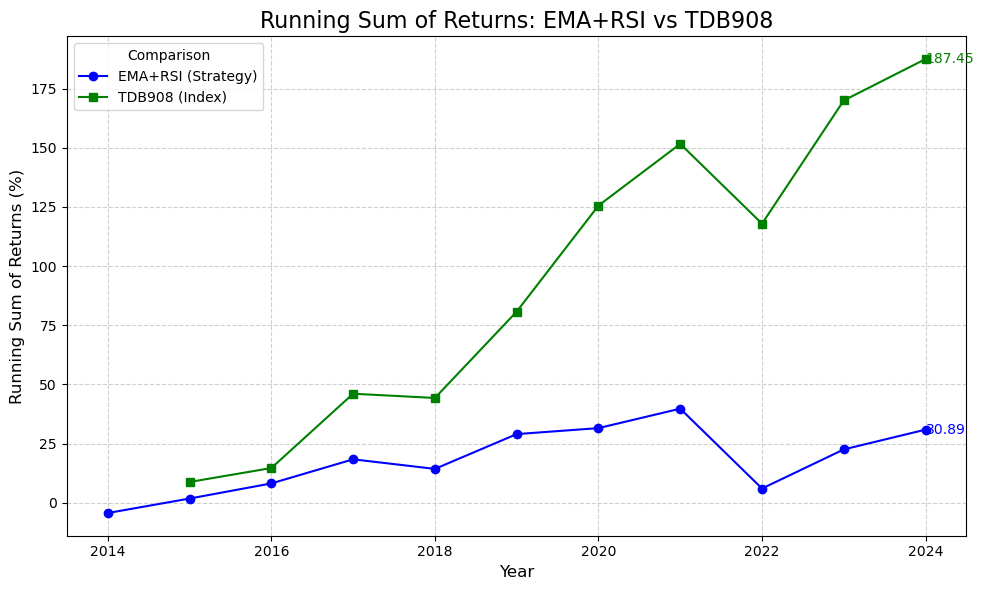

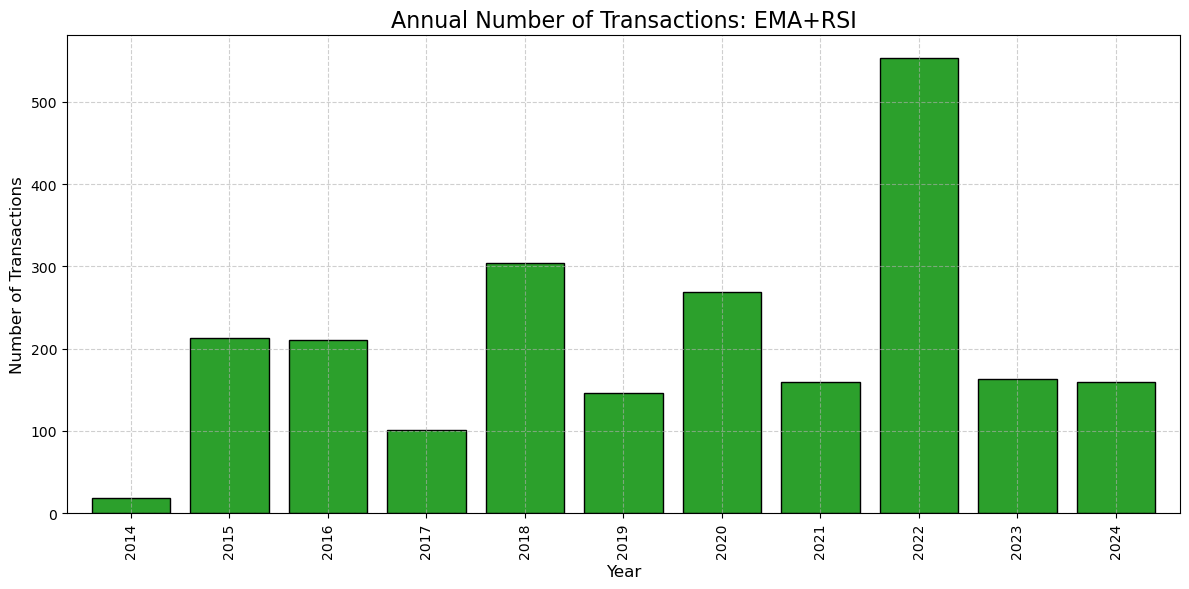

Analyzing strategy: BB+Williams


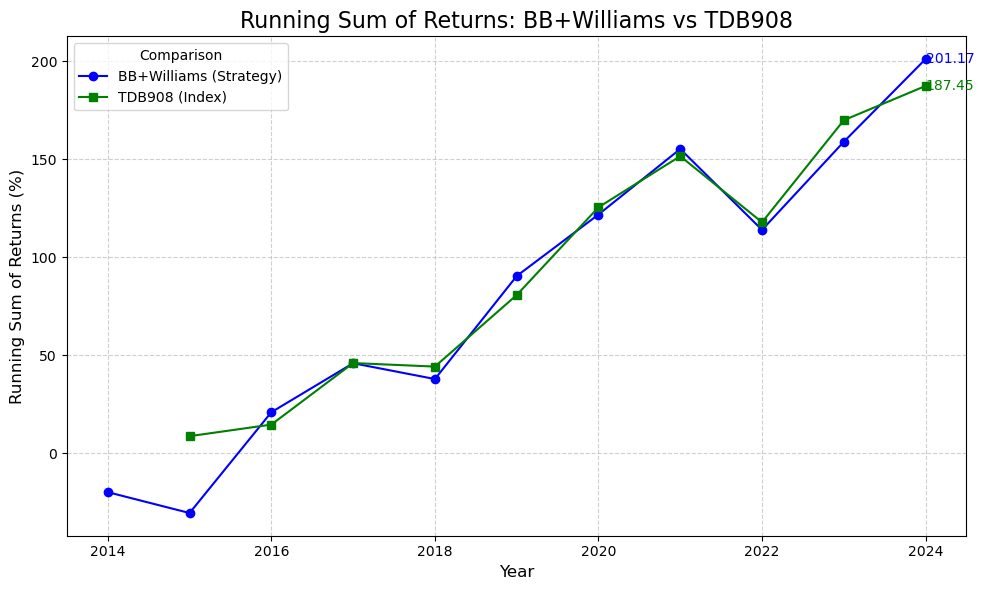

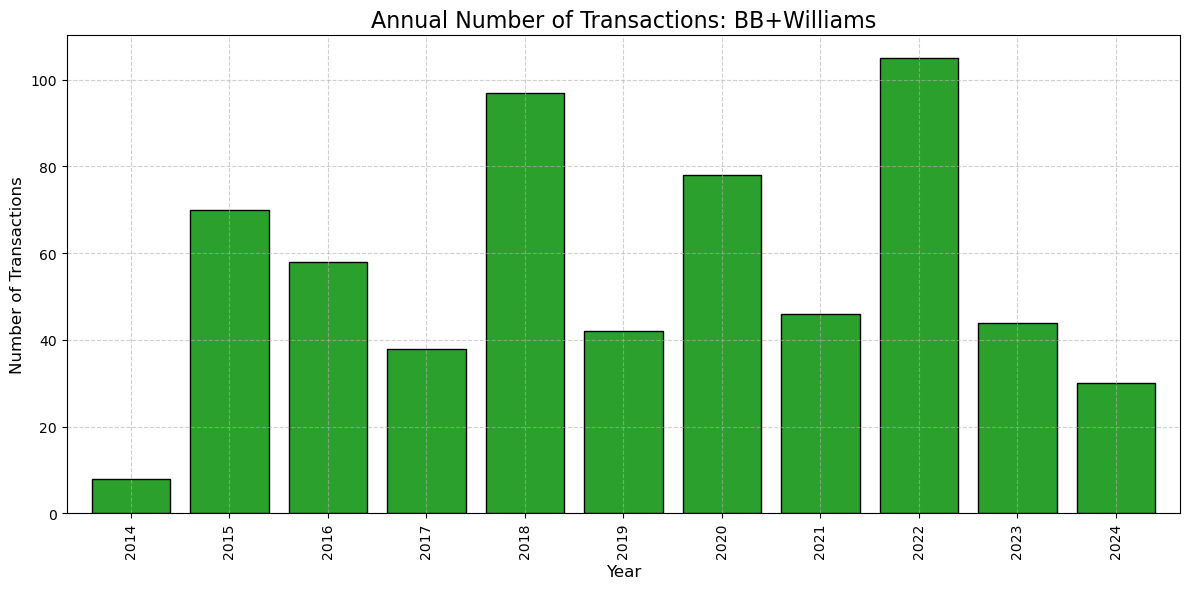

Analyzing strategy: Williams %R


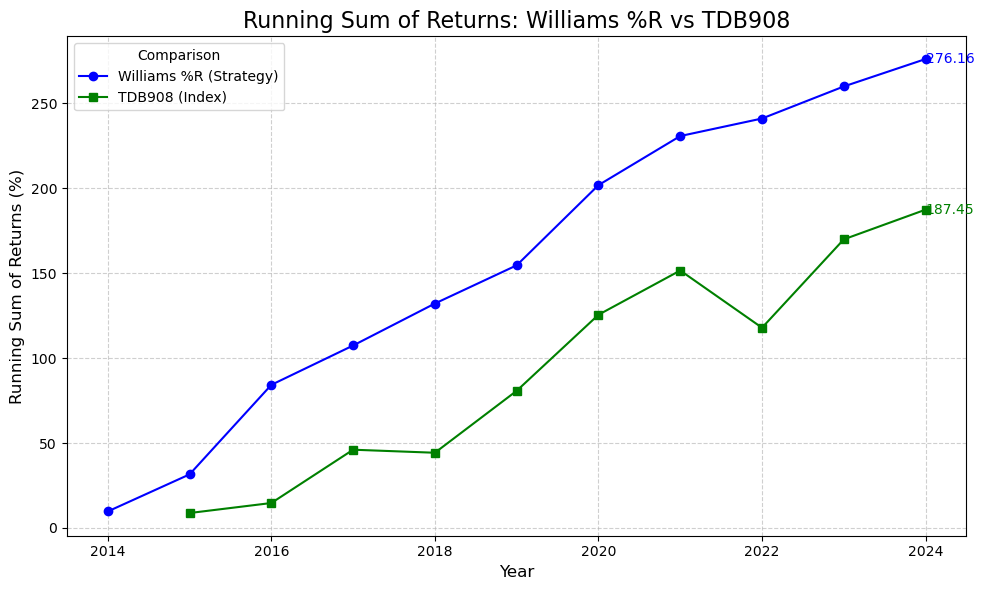

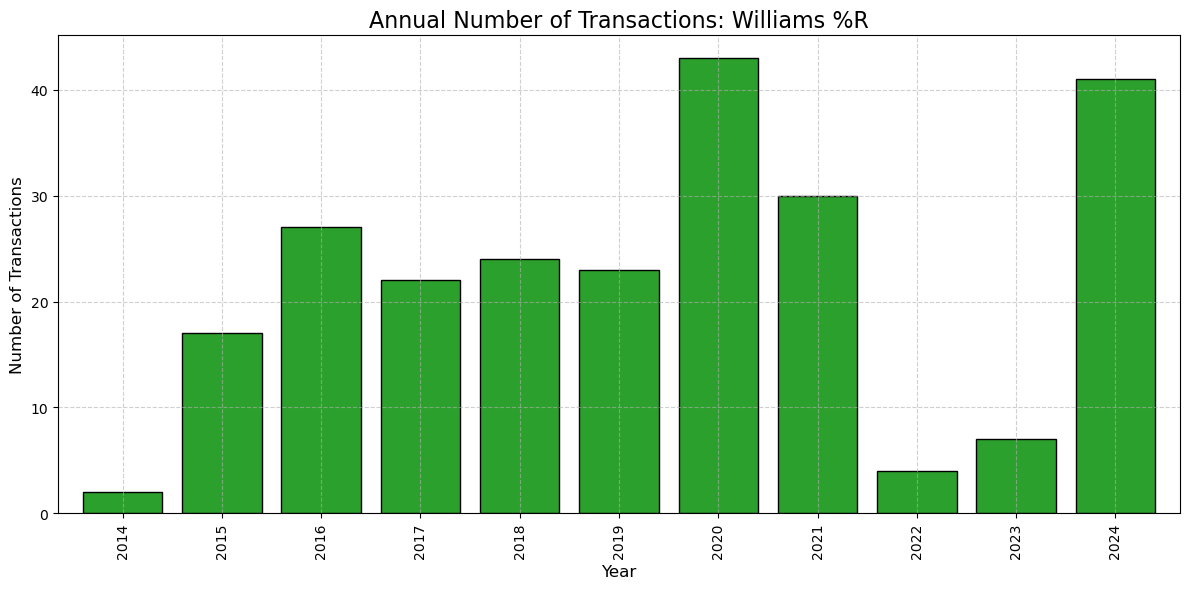

Analyzing strategy: Aroon Oscillator


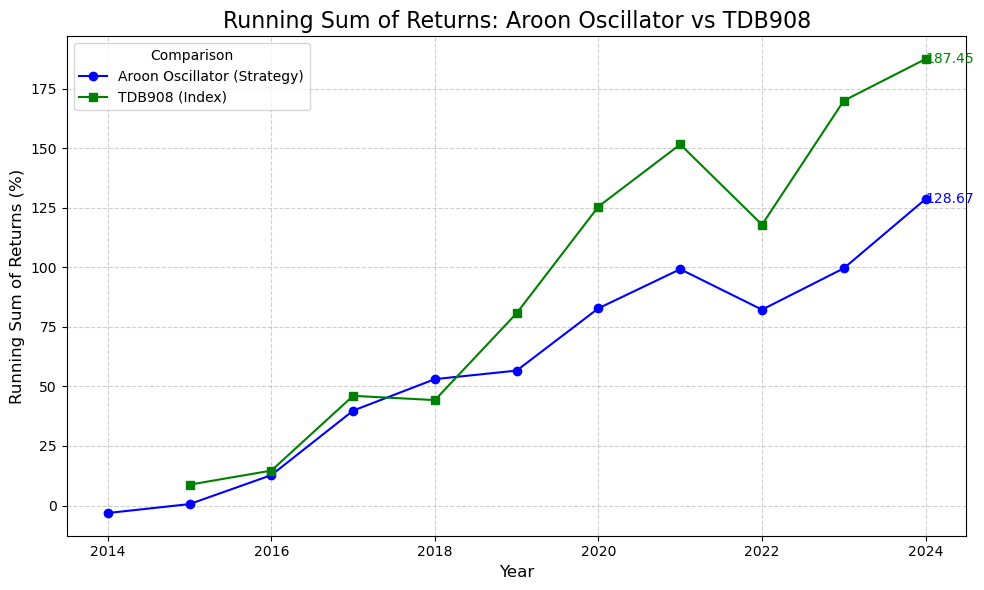

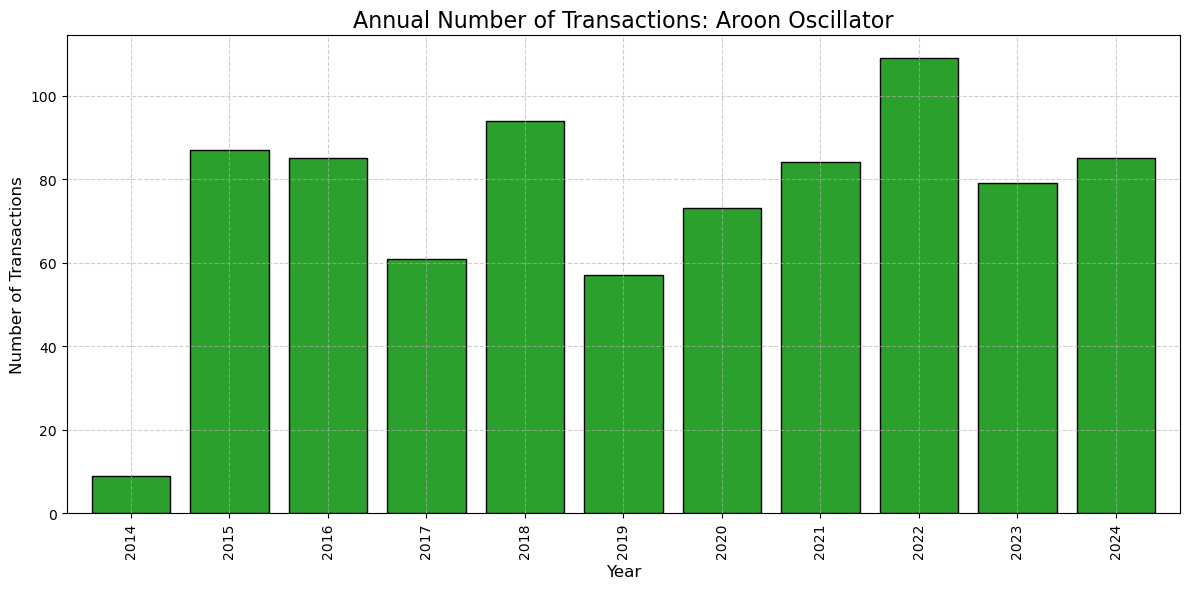

Analyzing strategy: Hammer


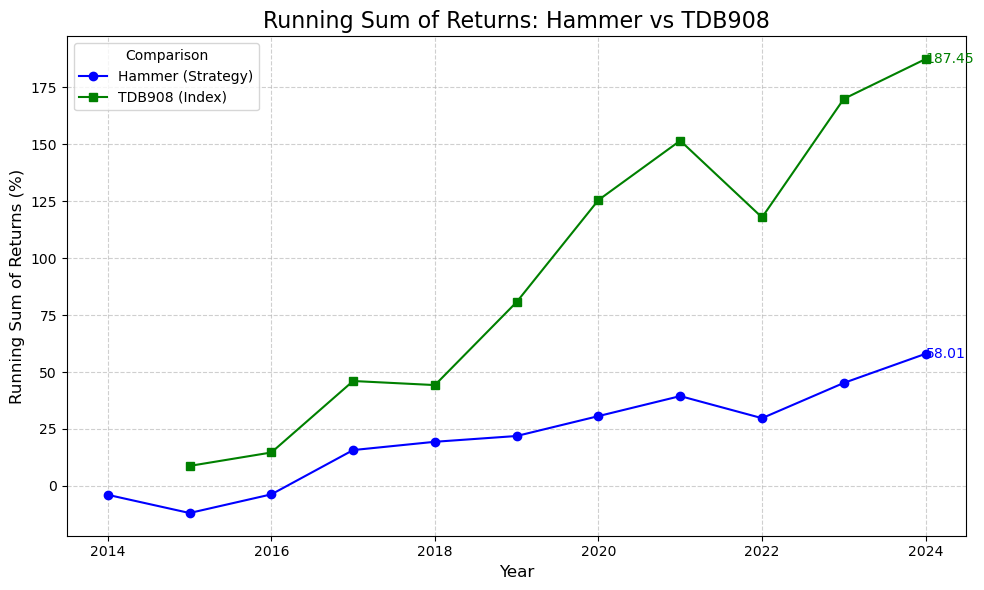

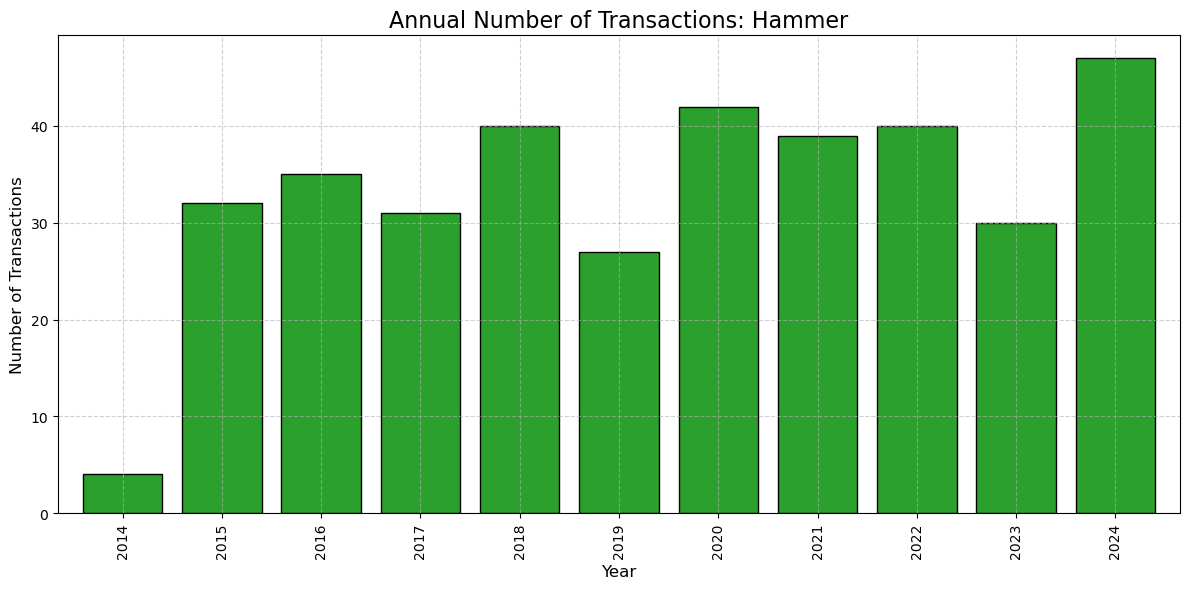

Analyzing strategy: Ultimate Oscillator


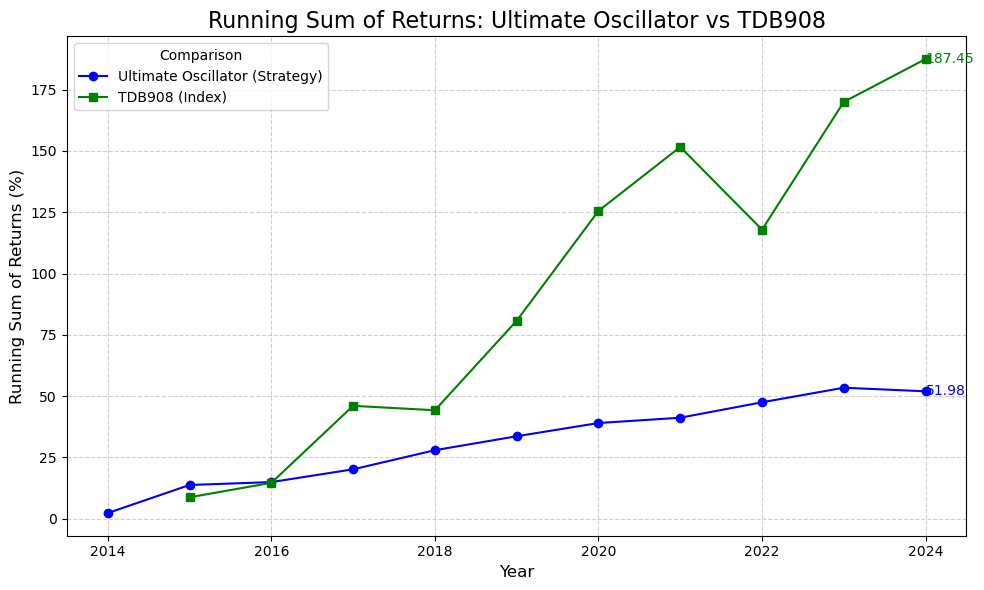

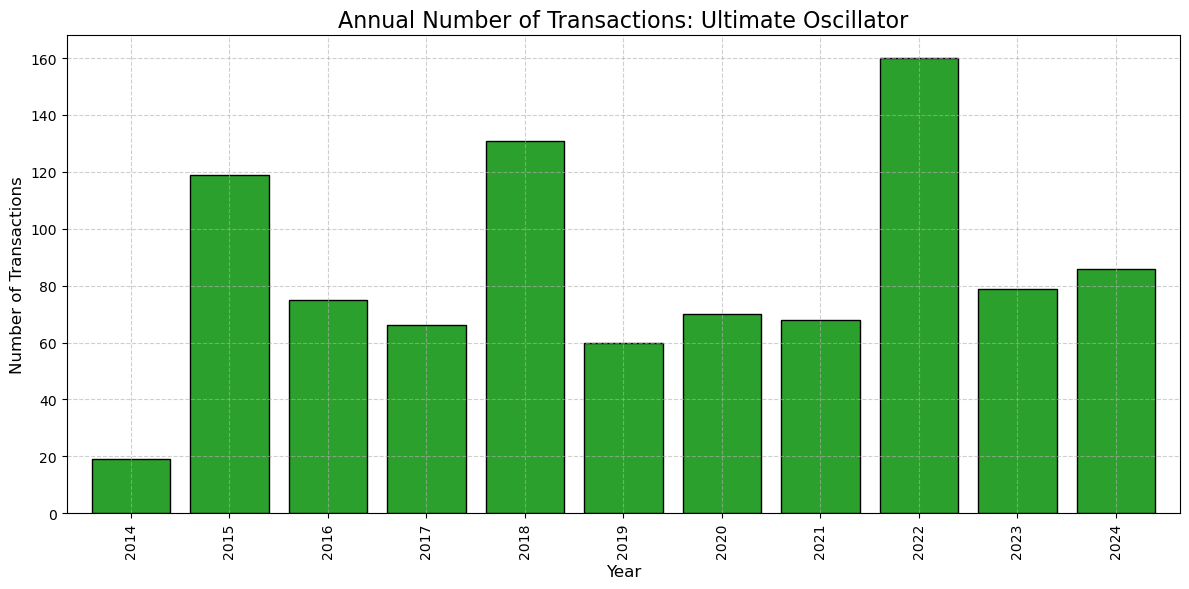

Analyzing strategy: Connor RSI


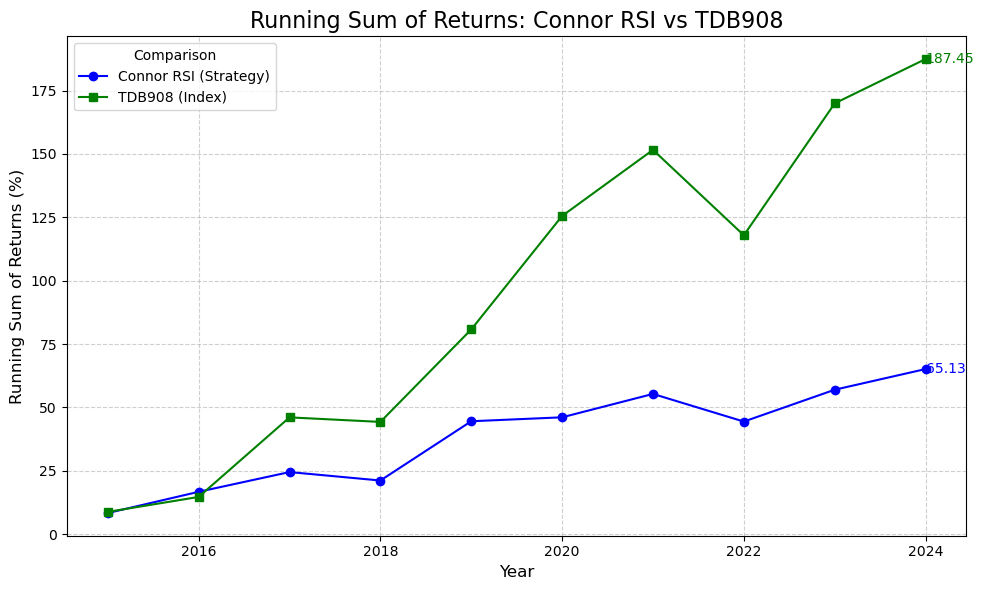

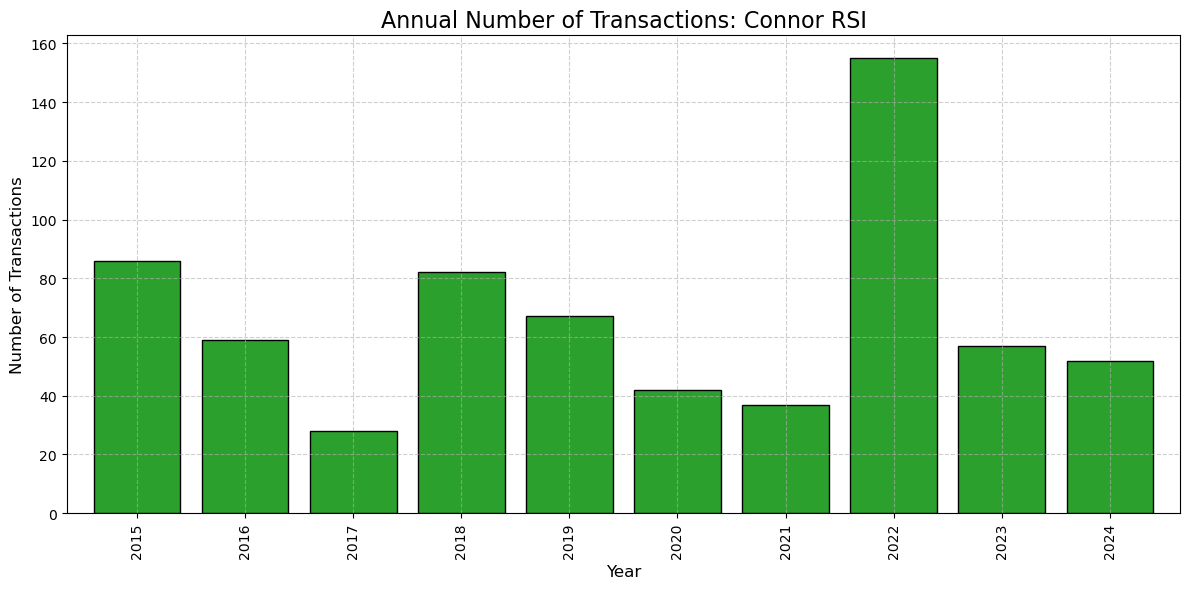

Analyzing strategy: Parabolic SAR


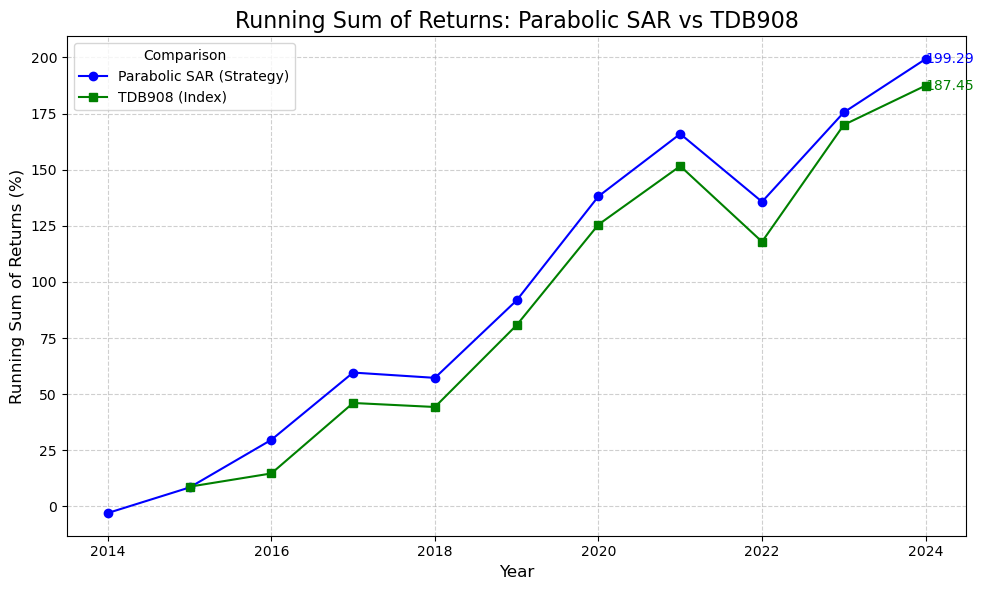

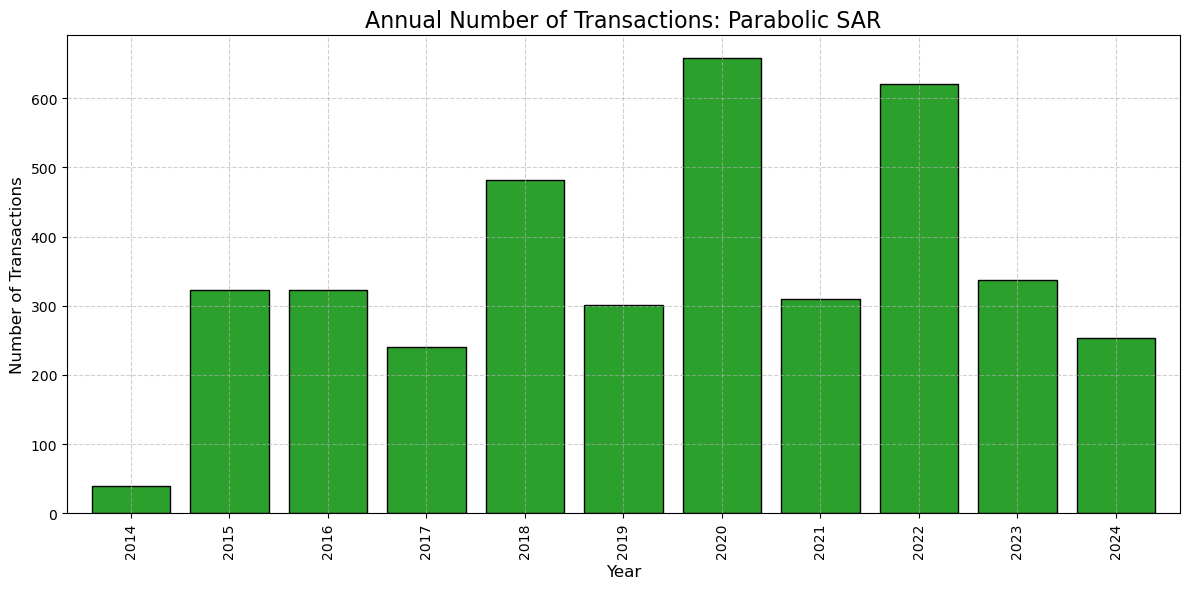

Analyzing strategy: CCI


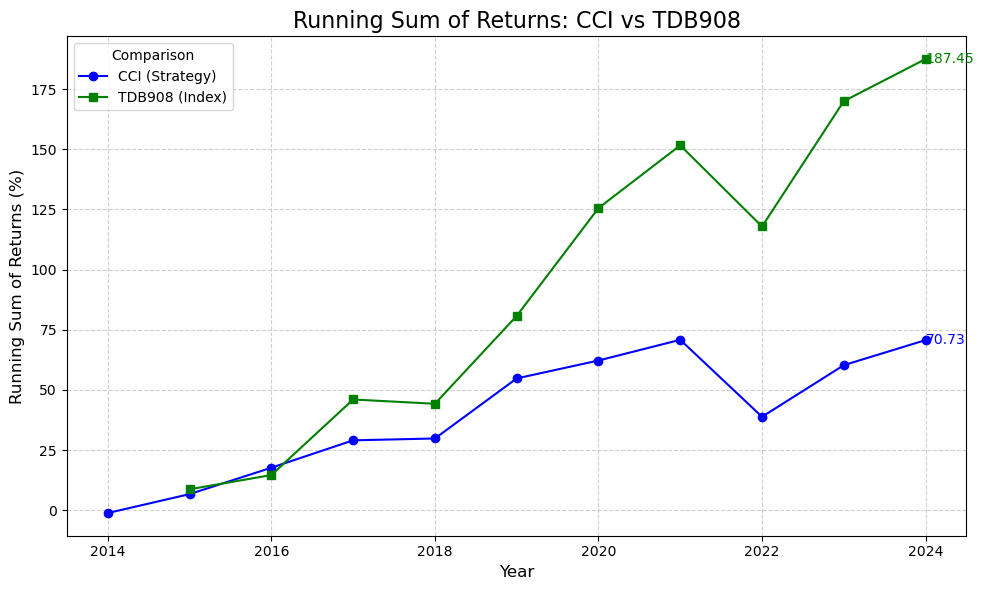

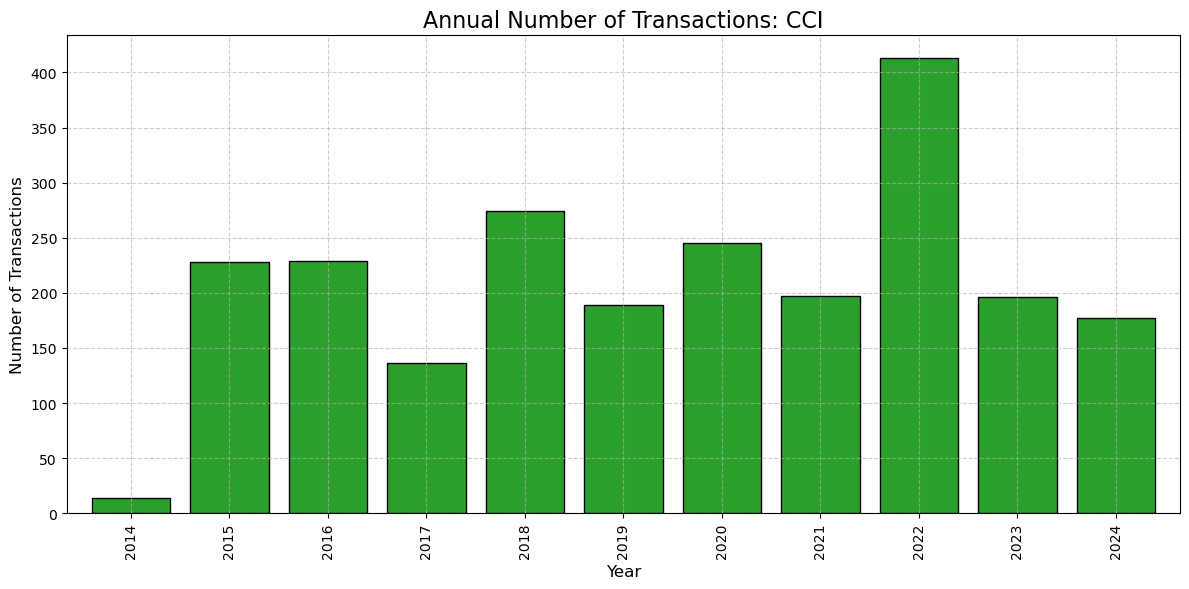

In [43]:
analyze_strategies(strategy_results, strategy_names, TDB908_df)

Cumlative Return Comparison to the Benchmark